# 1. Import Module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew

# 2. Data Wrangling

In [2]:
#Read the data
org_df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
org_df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_train = org_df_train.copy()
df_test = org_df_test.copy()

#### Overview of the data

<ul>
    <li>SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.</li>
    <li>MSSubClass: The building class</li>
    <li>MSZoning: The general zoning classification</li>
    <li>LotFrontage: Linear feet of street connected to property</li>
    <li>LotArea: Lot size in square feet</li>
    <li>Street: Type of road access</li>
    <li>Alley: Type of alley access</li>
    <li>LotShape: General shape of property</li>
    <li>LandContour: Flatness of the property</li>
    <li>Utilities: Type of utilities available</li>
    <li>LotConfig: Lot configuration</li>
    <li>LandSlope: Slope of property</li>
    <li>Neighborhood: Physical locations within Ames city limits</li>
    <li>Condition1: Proximity to main road or railroad</li>
    <li>Condition2: Proximity to main road or railroad (if a second is present)</li>
    <li>BldgType: Type of dwelling</li>
    <li>HouseStyle: Style of dwelling</li>
    <li>OverallQual: Overall material and finish quality</li>
    <li>OverallCond: Overall condition rating</li>
    <li>YearBuilt: Original construction date</li>
    <li>YearRemodAdd: Remodel date</li>
    <li>RoofStyle: Type of roof</li>
    <li>RoofMatl: Roof material</li>
    <li>Exterior1st: Exterior covering on house</li>
    <li>Exterior2nd: Exterior covering on house (if more than one material)</li>
    <li>MasVnrType: Masonry veneer type</li>
    <li>MasVnrArea: Masonry veneer area in square feet</li>
    <li>ExterQual: Exterior material quality</li>
    <li>ExterCond: Present condition of the material on the exterior</li>
    <li>Foundation: Type of foundation</li>
    <li>BsmtQual: Height of the basement</li>
    <li>BsmtCond: General condition of the basement</li>
    <li>BsmtExposure: Walkout or garden level basement walls</li>
    <li>BsmtFinType1: Quality of basement finished area</li>
    <li>BsmtFinSF1: Type 1 finished square feet</li>
    <li>BsmtFinType2: Quality of second finished area (if present)</li>
    <li>BsmtFinSF2: Type 2 finished square feet</li>
    <li>BsmtUnfSF: Unfinished square feet of basement area</li>
    <li>TotalBsmtSF: Total square feet of basement area</li>
    <li>Heating: Type of heating</li>
    <li>HeatingQC: Heating quality and condition</li>
    <li>CentralAir: Central air conditioning</li>
    <li>Electrical: Electrical system</li>
    <li>1stFlrSF: First Floor square feet</li>
    <li>2ndFlrSF: Second floor square feet</li>
    <li>LowQualFinSF: Low quality finished square feet (all floors)</li>
    <li>GrLivArea: Above grade (ground) living area square feet</li>
    <li>BsmtFullBath: Basement full bathrooms</li>
    <li>BsmtHalfBath: Basement half bathrooms</li>
    <li>FullBath: Full bathrooms above grade</li>
    <li>HalfBath: Half baths above grade</li>
    <li>Bedroom: Number of bedrooms above basement level</li>
    <li>Kitchen: Number of kitchens</li>
    <li>KitchenQual: Kitchen quality</li>
    <li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li>
    <li>Functional: Home functionality rating</li>
    <li>Fireplaces: Number of fireplaces</li>
    <li>FireplaceQu: Fireplace quality</li>
    <li>GarageType: Garage location</li>
    <li>GarageYrBlt: Year garage was built</li>
    <li>GarageFinish: Interior finish of the garage</li>
    <li>GarageCars: Size of garage in car capacity</li>
    <li>GarageArea: Size of garage in square feet</li>
    <li>GarageQual: Garage quality</li>
    <li>GarageCond: Garage condition</li>
    <li>PavedDrive: Paved driveway</li>
    <li>WoodDeckSF: Wood deck area in square feet</li>
    <li>OpenPorchSF: Open porch area in square feet</li>
    <li>EnclosedPorch: Enclosed porch area in square feet</li>
    <li>3SsnPorch: Three season porch area in square feet</li>
    <li>ScreenPorch: Screen porch area in square feet
    <li>PoolArea: Pool area in square feet</li>
    <li>PoolQC: Pool quality</li>
    <li>Fence: Fence quality</li>
    <li>MiscFeature: Miscellaneous feature not covered in other categories</li>
    <li>MiscVal: <span>&#36;</span>Value of miscellaneous feature</li>
    <li>MoSold: Month Sold</li>
    <li>YrSold: Year Sold</li>
    <li>SaleType: Type of sale</li>
    <li>SaleCondition: Condition of sale</li>
</ul>

In [3]:
#first 5 values of a dataset
pd.set_option('display.max_columns', None)
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
#first 5 values of a dataset
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [5]:
#Rows and columns in df_train
df_train.shape

(1460, 81)

In [6]:
#Rows and columns in df_test
df_test.shape

(1459, 80)

In [7]:
#information of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<b>From above information we can say that</b>
<ul>
    <li>LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
        FireplaceQu, GarageType, GarageYrBlt, Electrical, GarageFinish, GarageQual, GarageCond, PoolQC, Fence,  MiscFeature,
        has missing values</li>
</ul>

In [8]:
# mathematical overview of the data
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

<b>From above information we can say that</b>
<ul>
    <li>Average saleprice: 180921</li>
    <li>Maximum saleprice: 755000</li>
    <li>minimum salesprice: 34900</li>
    <li>yearbuilt lies between 1872-2010</li>
<ul>

In [9]:
# Checking duplicate values in train dataset
df_train.duplicated().sum()

0

In [10]:
# Checking duplicate values in train dataset
df_test.duplicated().sum()

0

In [11]:
# mathematical overview of the object data
df_train.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [12]:
#Total missing values in df_train
df_train.isnull().sum().sum()

6965

In [13]:
#Total missing values in df_test
df_test.isnull().sum().sum()

7000

In [14]:
#Columns having missing values in df_train
[features for features in df_train.columns if df_train[features].isnull().sum()>0]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [15]:
#Columns having missing values in df_test
[features for features in df_test.columns if df_test[features].isnull().sum()>0]

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [16]:
#colums that have missing value more than 30%
pd.options.display.max_rows=None ## shows all the rows
[features for features in df_train.columns if df_train[features].isnull().sum()*100/len(df_train)>30]

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [17]:
#colums that have missing value more than 30%
[features for features in df_test.columns if df_test[features].isnull().sum()*100/len(df_test)>30]

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [18]:
#Removing columns who have more than 30% of missing data
df_train.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1,inplace=True)

In [19]:
#Removing columns who have more than 30% of missing data
df_test.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1,inplace=True)

In [20]:
#Checking for null values after removing columns who have more than 30% of missing data
df_train.isnull().sum().sum()

868

As other columns have less than 30% of missing values, then we will fill these values with mode for categorical and median for numerical. 

In [21]:
#numeric columns with missing values
train_num_col=[features for features in df_train.select_dtypes(exclude = ['object']).columns if df_train[features].isnull().sum()*100/len(df_train)>0]

In [22]:
#categorical features (non-numeric columns) with missing values
train_obj_col=[features for features in df_train.select_dtypes(exclude = ['number']).columns if df_train[features].isnull().sum()*100/len(df_train)>0]

In [23]:
#filling the numerical values of df_train dataset with median
median=round(df_train[train_num_col].median(),1)
df_train[train_num_col]=df_train[train_num_col].fillna(median)

In [24]:
#filling the categorical values of df_train dataset with mode
df_train[train_obj_col]=df_train[train_obj_col].fillna(df_train[train_obj_col].mode().iloc[0])

In [25]:
#Checking for null values after cleaning df_train dataset
df_train.isnull().sum().sum()

0

In [26]:
#numeric columns with missing values
test_num_col=[features for features in df_test.select_dtypes(exclude = ['object']).columns if df_test[features].isnull().sum()*100/len(df_test)>0]

In [27]:
#non-numeric columns with missing values
test_obj_col=[features for features in df_test.select_dtypes(exclude = ['number']).columns if df_test[features].isnull().sum()*100/len(df_test)>0]

In [28]:
#filling the numerical values of df_train dataset with mean
median=round(df_test[test_num_col].median(),1)
df_test[test_num_col]=df_test[test_num_col].fillna(median)

In [29]:
#filling the categorical values of df_train dataset with mode
df_test[test_obj_col]=df_test[test_obj_col].fillna(df_test[test_obj_col].mode().iloc[0])

In [30]:
#Checking for null values after cleaning df_test dataset
df_test.isnull().sum().sum()

0

In [31]:
#number of rows and columns of df_train dataset
df_train.shape

(1460, 75)

In [32]:
#number of rows and columns of df_test dataset
df_test.shape

(1459, 74)

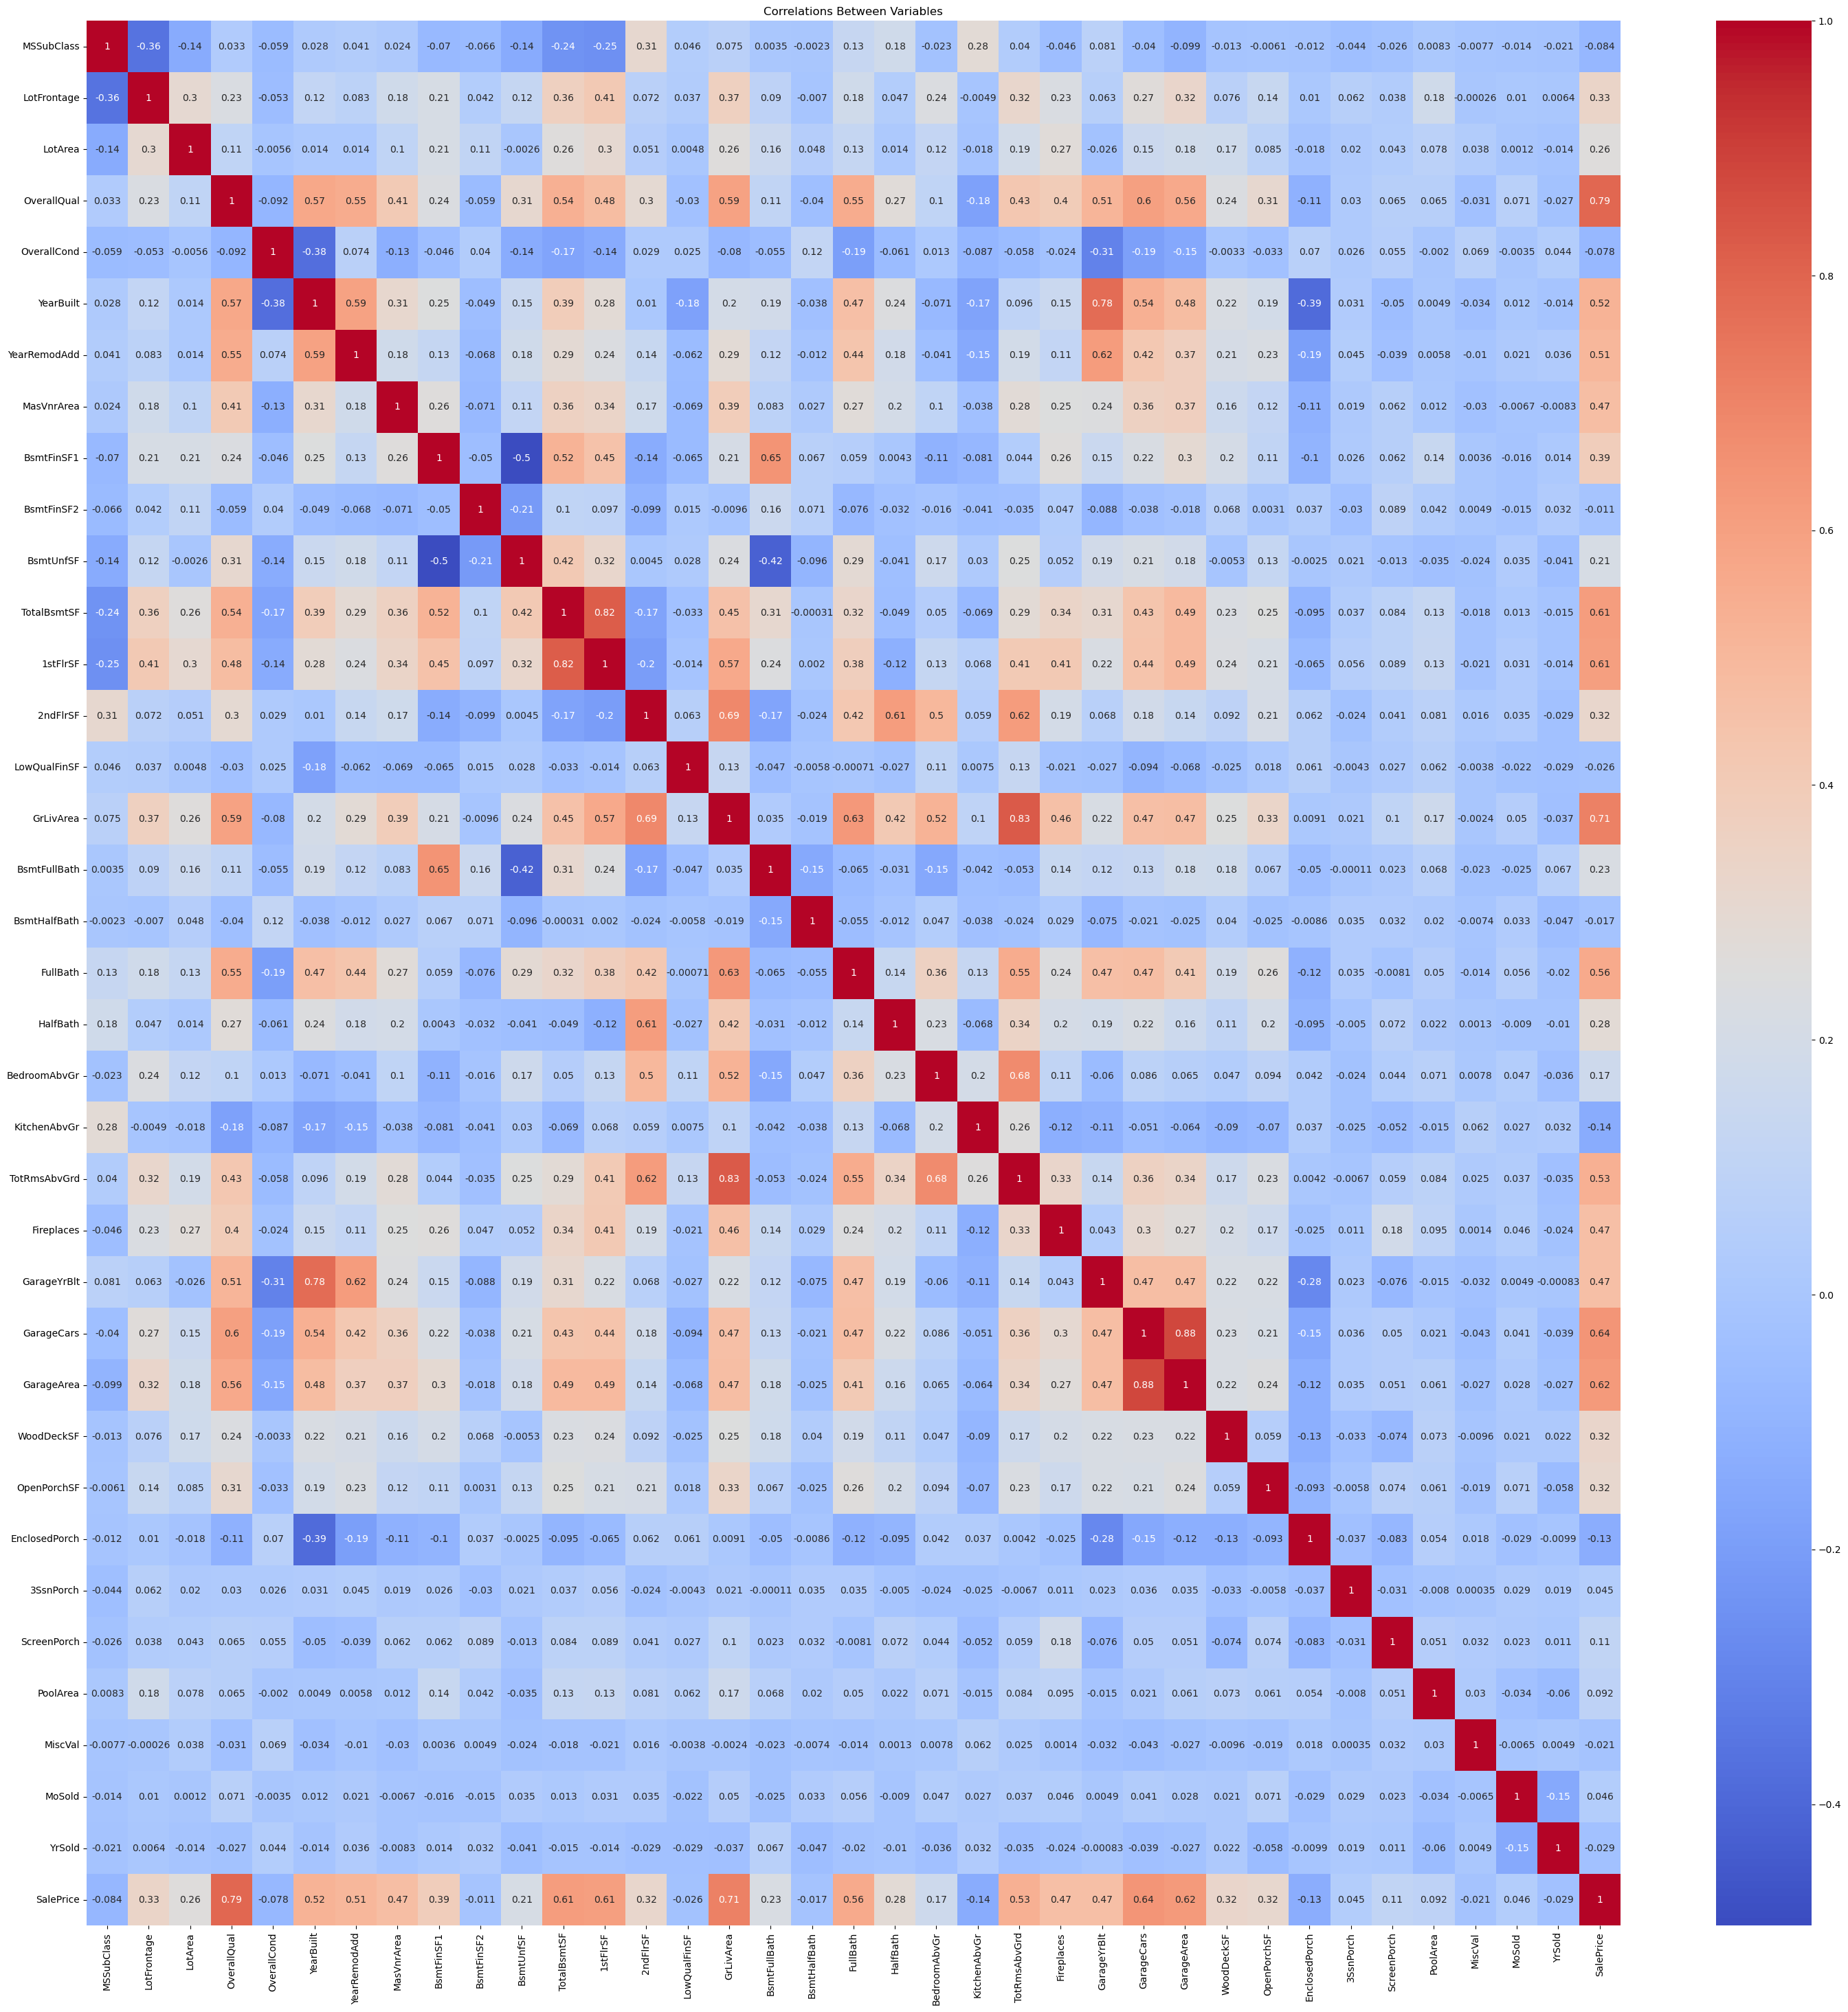

In [33]:
#Correlations Between Variables
plt.figure(figsize=(36,36))
sns.heatmap(df_train.corr(), cmap="coolwarm",annot=True)
plt.title("Correlations Between Variables", size=12)
plt.show()
#highly correlated features with SalePrice 
#high_corr = df_train.corr()
#high_corr_features = high_corr.index[abs(high_corr["SalePrice"]) >= 0.5]
#high_corr_features.tolist()

### Conclusion:
<ul>
    <li>OverallQual, GrLivArea, GarageCars, GarageArea have a good correlation with SalePrice.</li>
    <li>YrSold, YearBuilt, YearRemodAdd, GarageYrBlt not have so good correlation with SalePrice.</li>
</ul>
So, we will examine it more in EDA section.

# 3. EDA

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

I have divided the visualization in 3 parts. The first 2 parts are according to the types of data and last one is outlier detection.<br>
The two main types of data are:
<ul>
    <li>Quantitative (numerical) data</li>
    <ul>
        <li>Discrete Data values</li>
        <li>Continous Data values</li>
    </ul>
	<li>Qualitative (categorical) data</li>
    <ul>
        <li>Nominal Data</li>
        <li>Ordinal Data</li>
    </ul>
</ul>

### Numerical features

In [34]:
#numerical features
numerical_feature=[features for features in df_train.select_dtypes(exclude = ['object']).columns]
numerical_feature

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [35]:
#year feature
year_feature = [feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

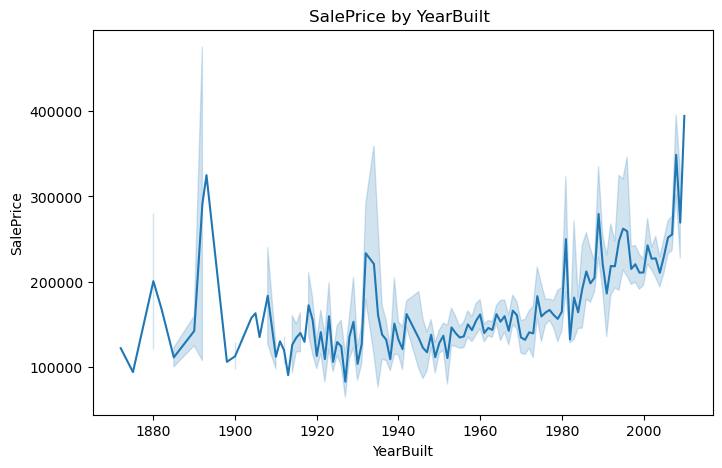

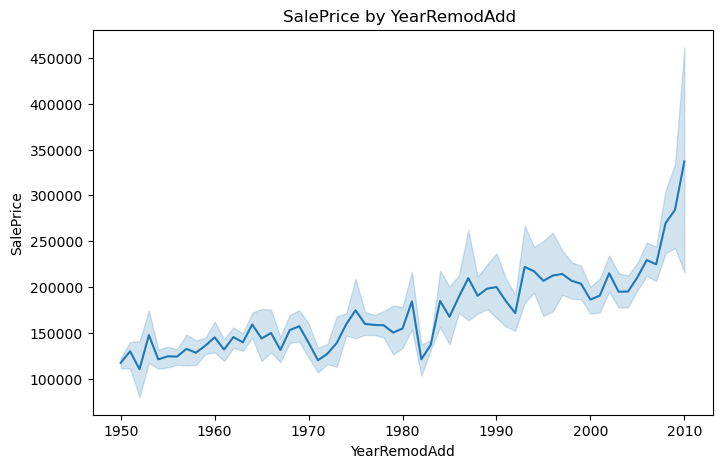

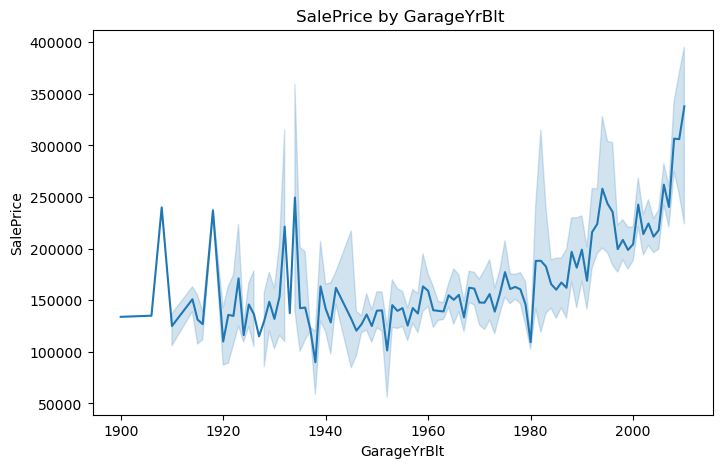

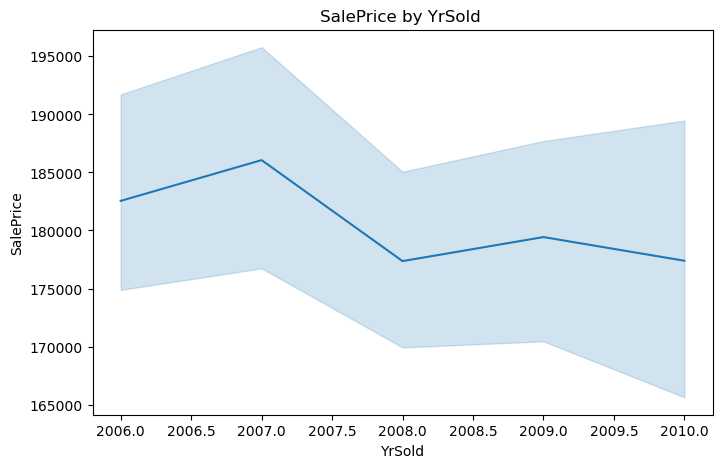

In [36]:
for feature in year_feature:
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_train, x=feature, y='SalePrice')
    plt.title(f"SalePrice by {feature} ")
    plt.show()

### Conclusion:
<ul>
    <li>SalePrice is increasing as YearBuilt, YearRemodAdd, GarageYrBlt is increasing.</li>
    <li>SalePrice is decreasing as YrSold is increasing. Why?</li>
</ul>

In [37]:
#extracting all distcrete columns
discrete_feature = [feature for feature in numerical_feature if len(df_train[feature].unique())<25 and feature not in year_feature]
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

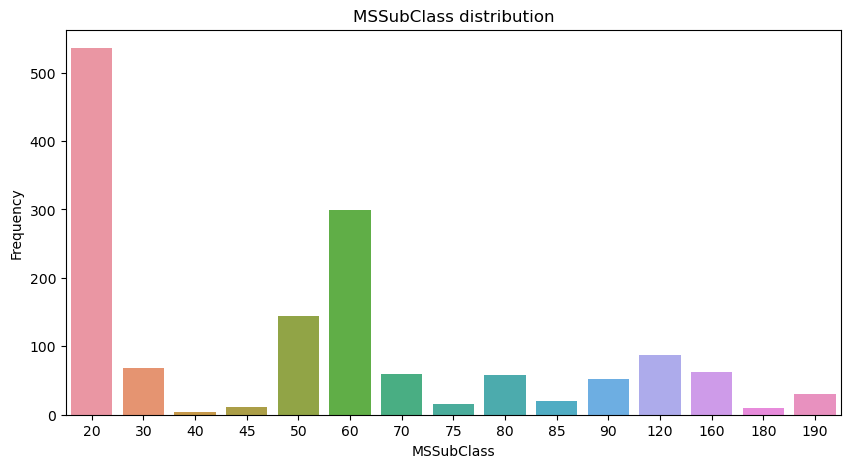

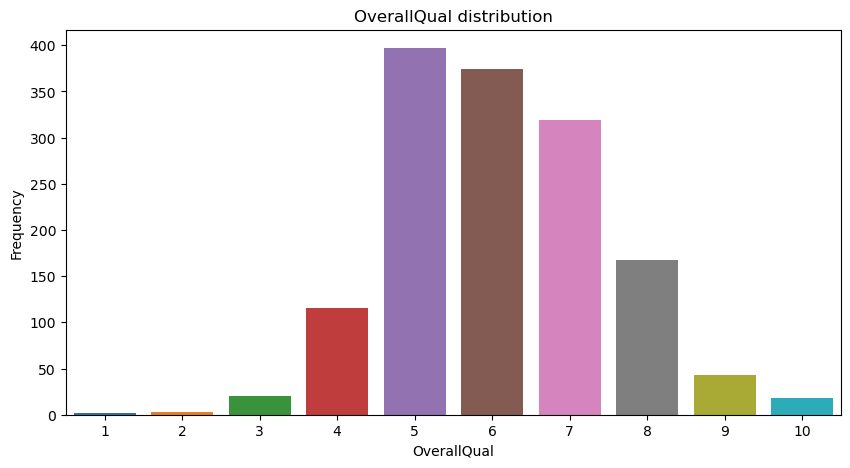

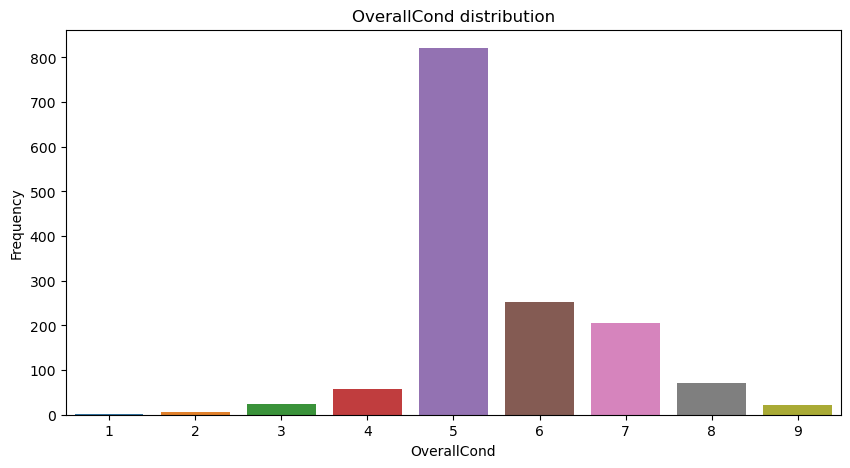

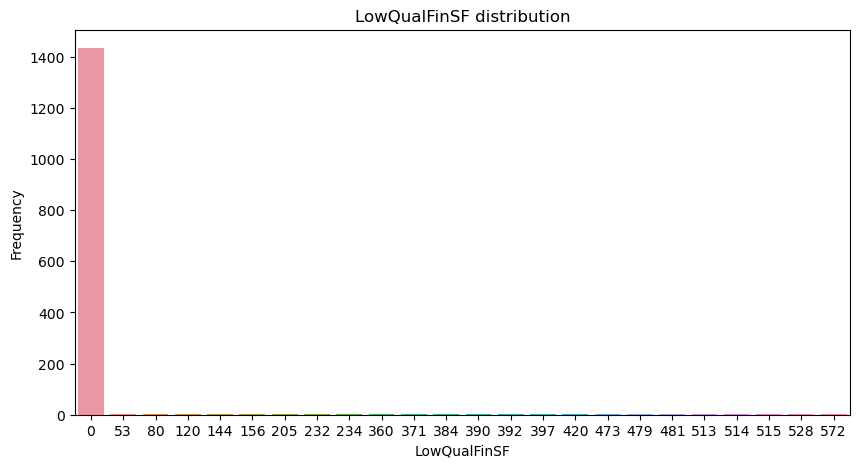

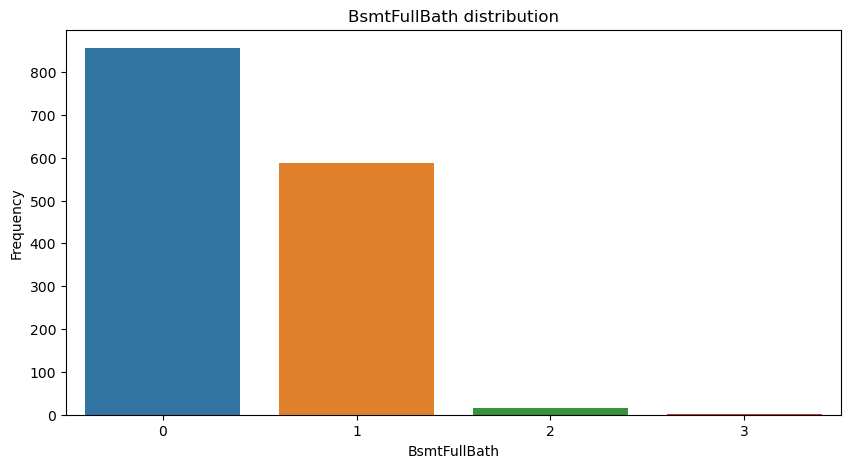

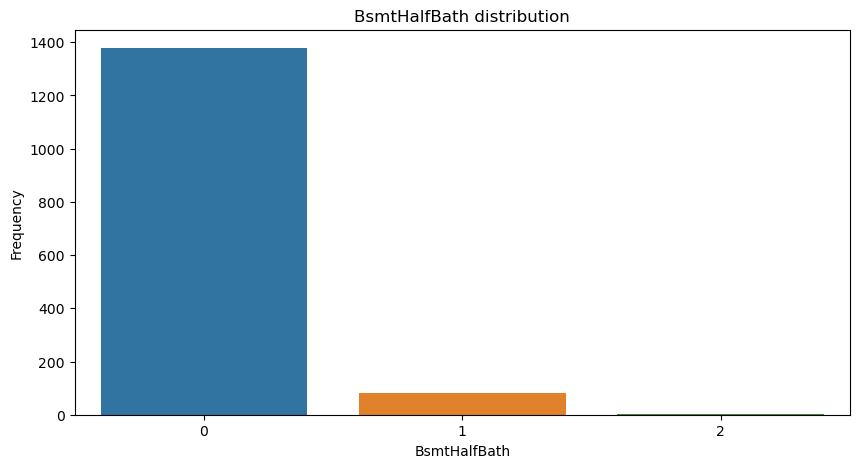

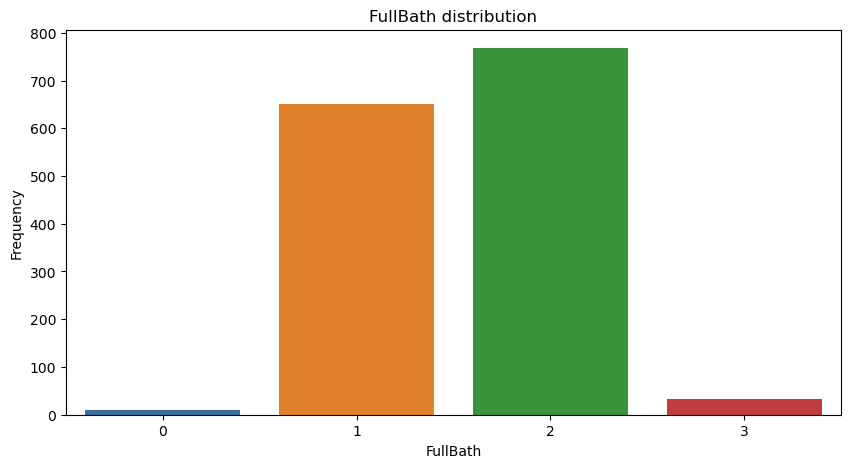

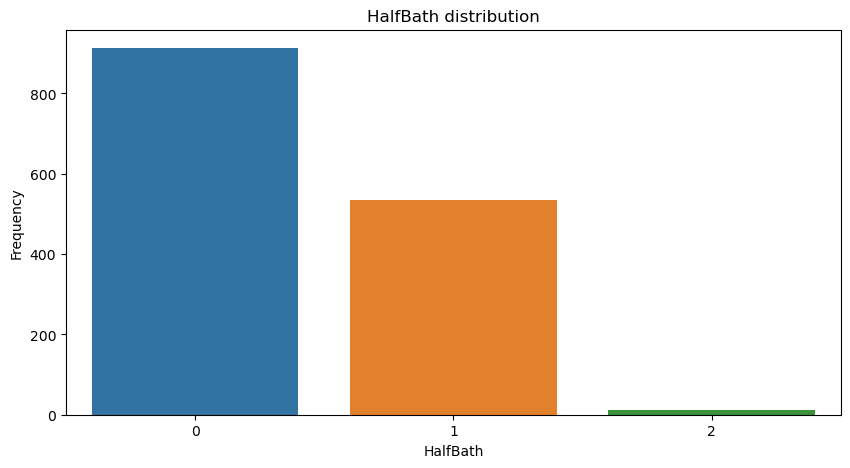

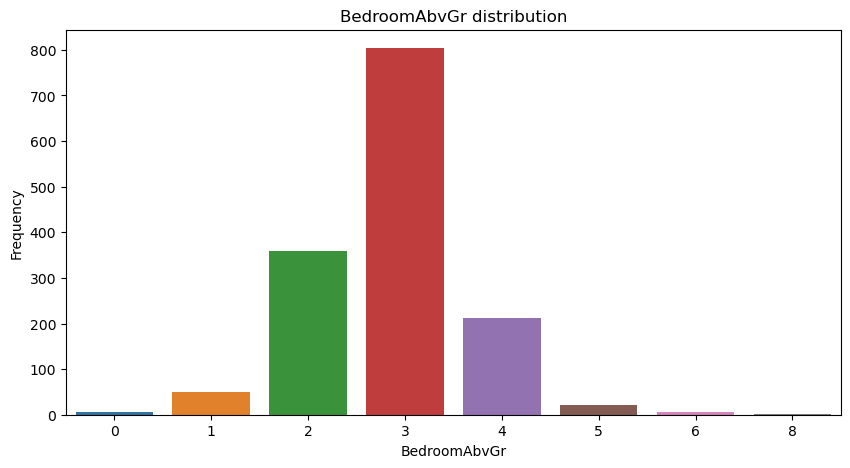

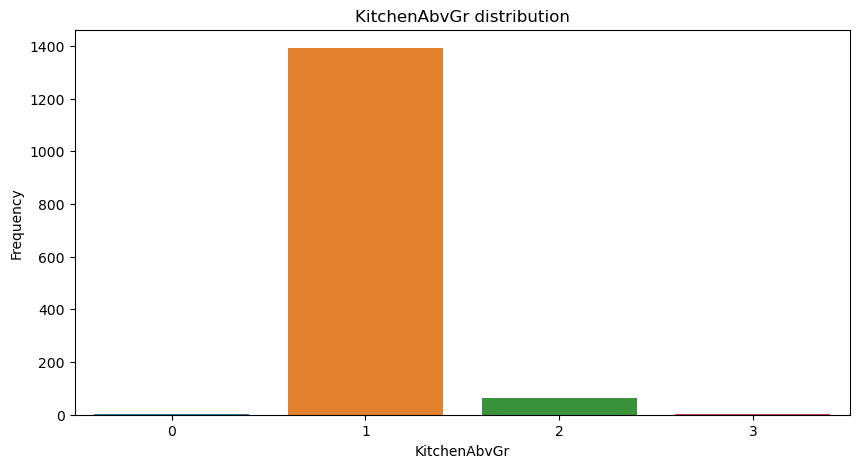

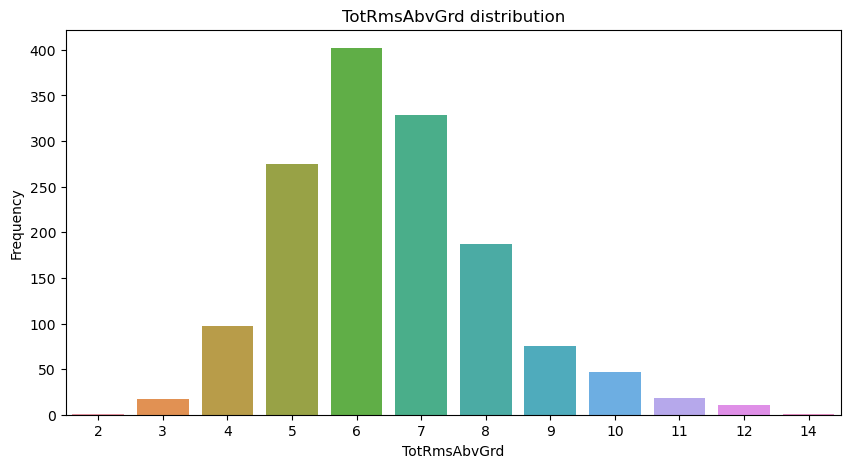

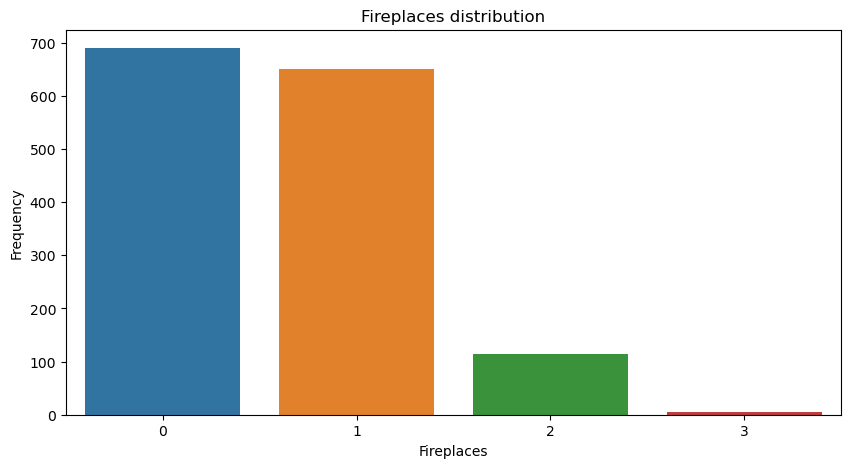

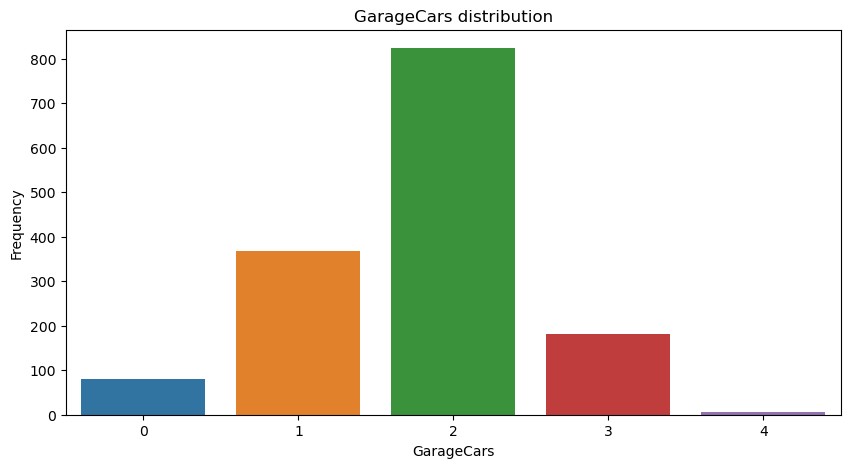

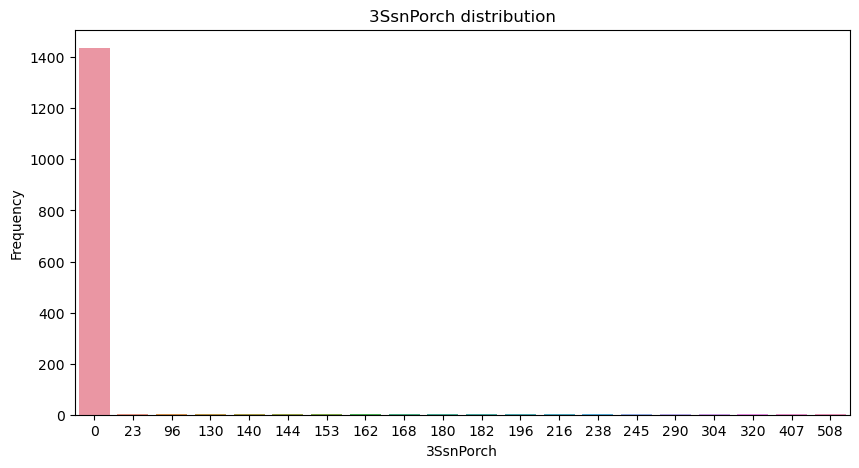

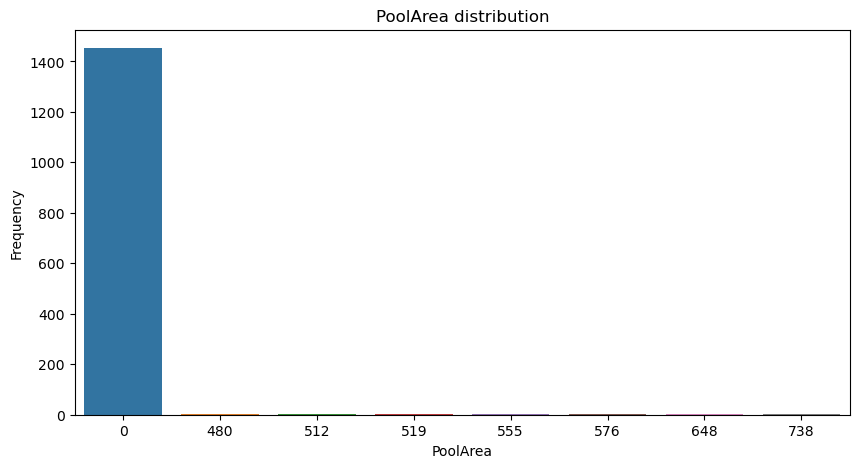

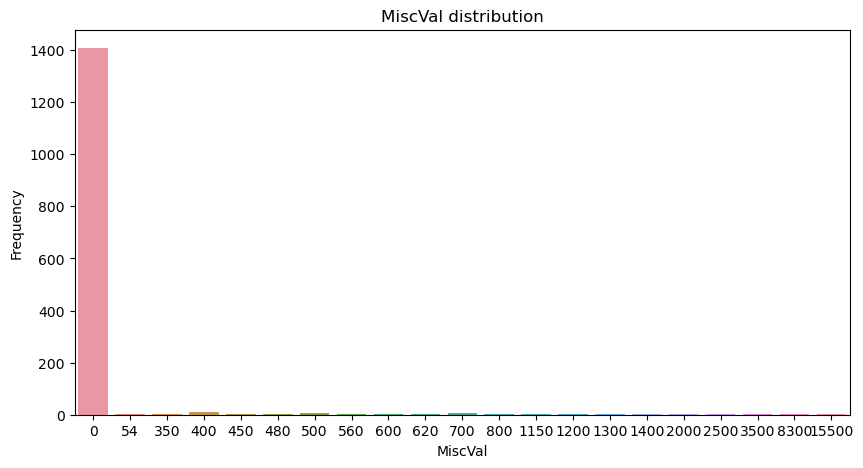

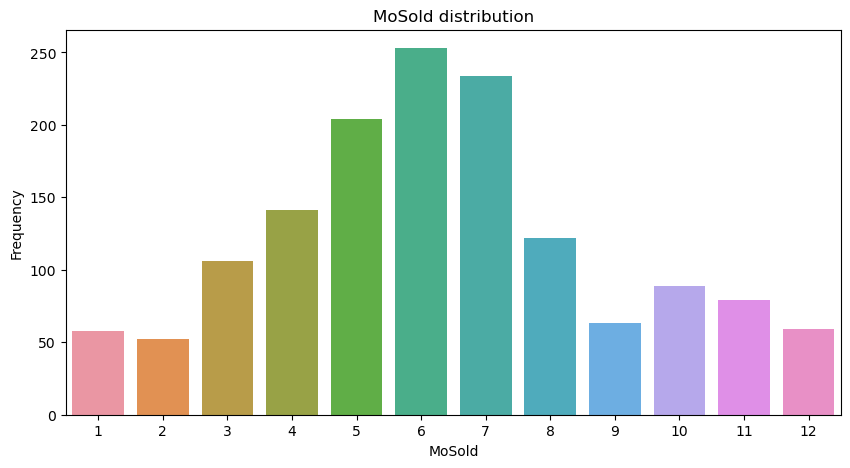

In [38]:
#Visualizing discrete features
for feature in discrete_feature:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df_train, x=feature)
    plt.ylabel('Frequency')
    plt.title(f"{feature} distribution")
    plt.show()

Now, let us check all discrete variables w.r.t SalePrice

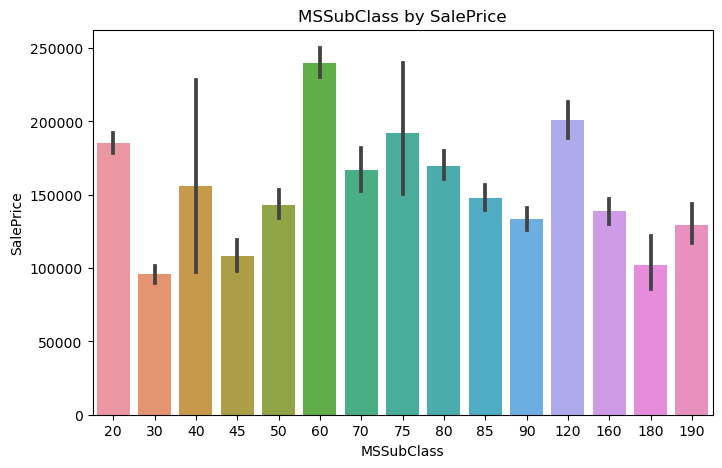

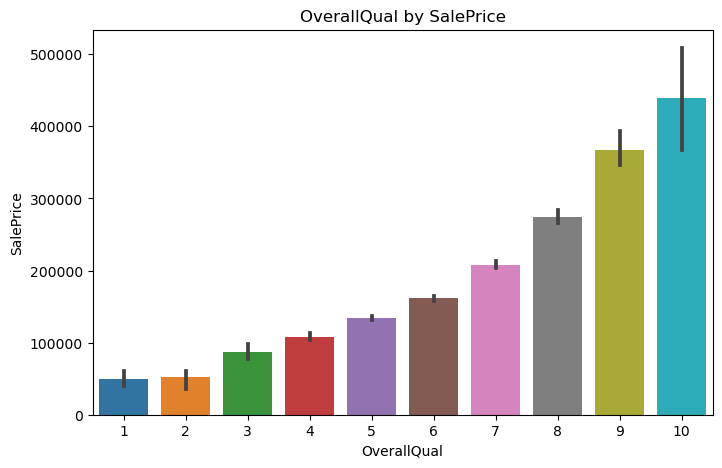

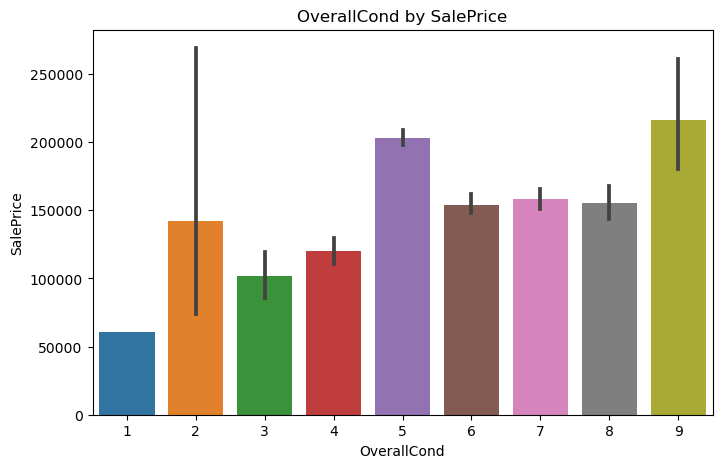

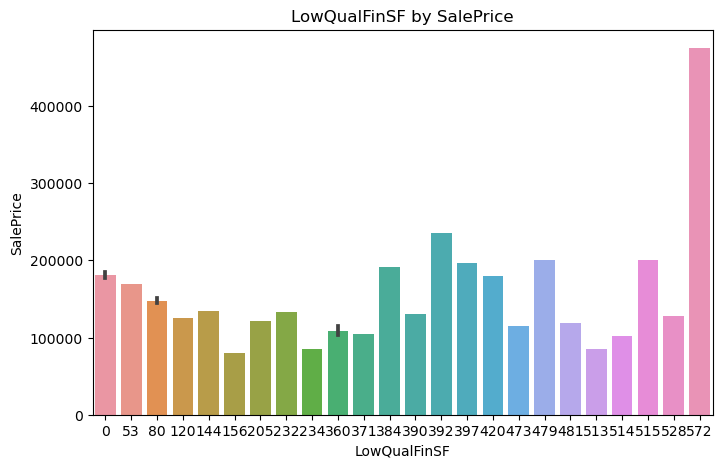

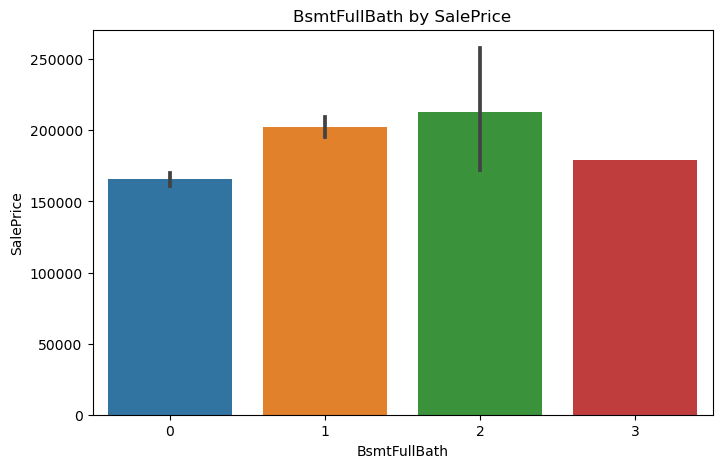

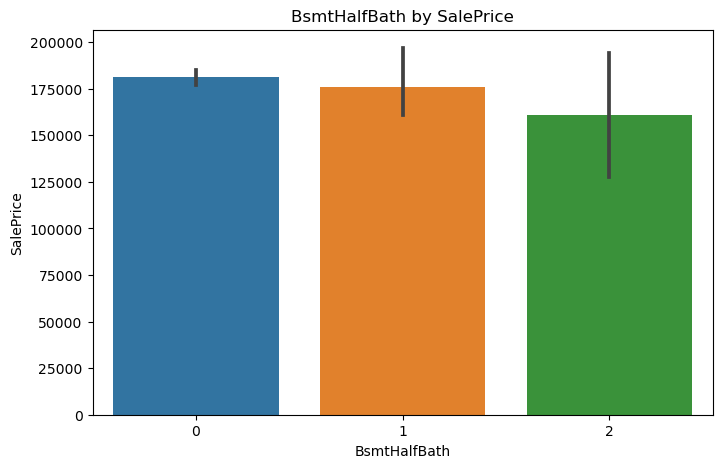

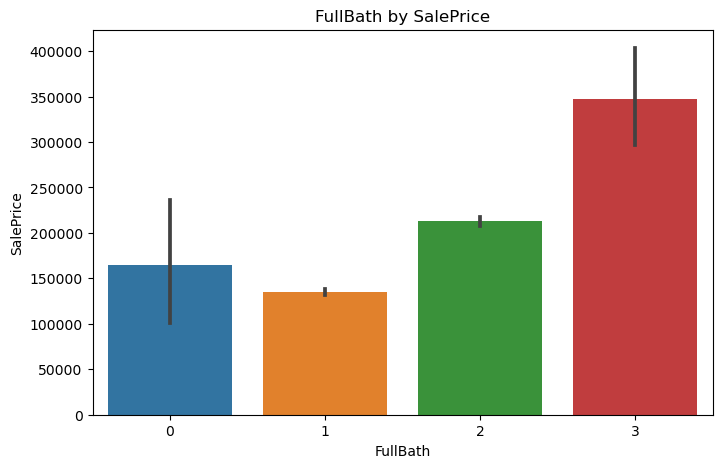

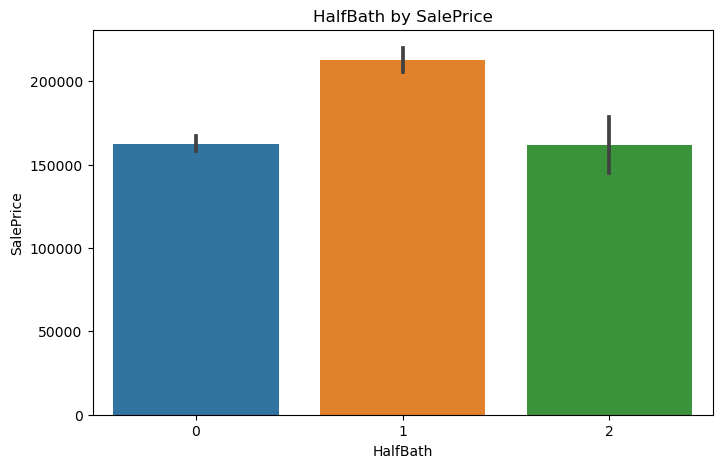

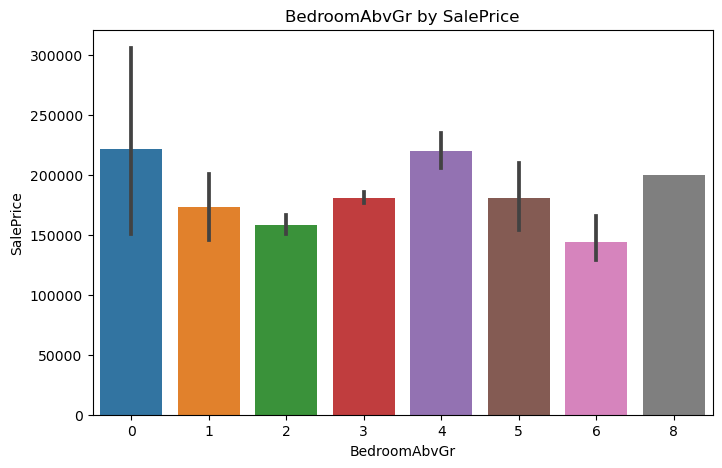

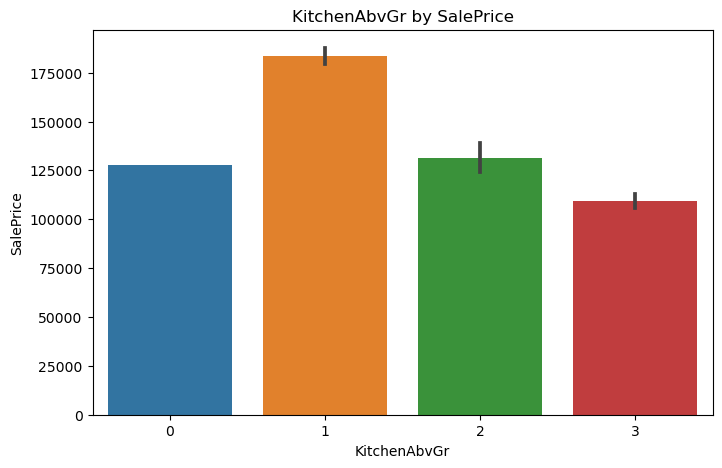

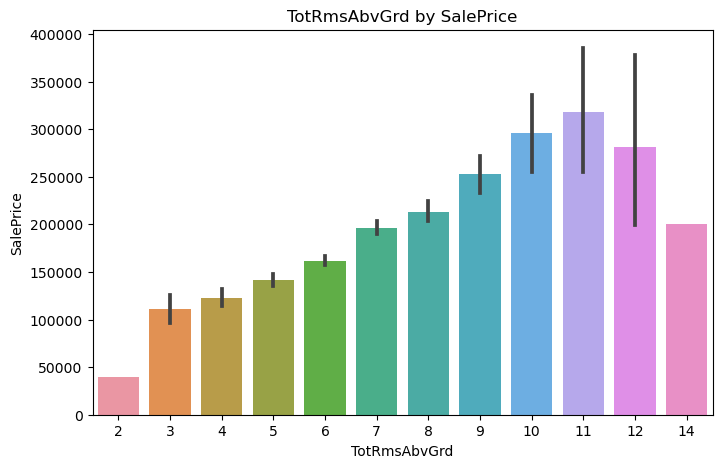

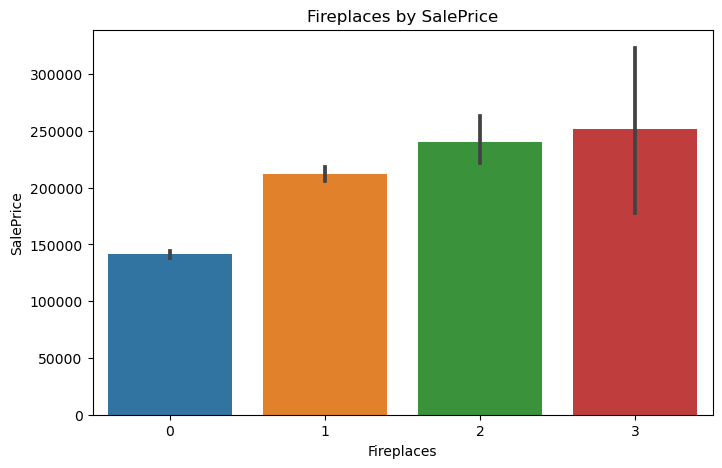

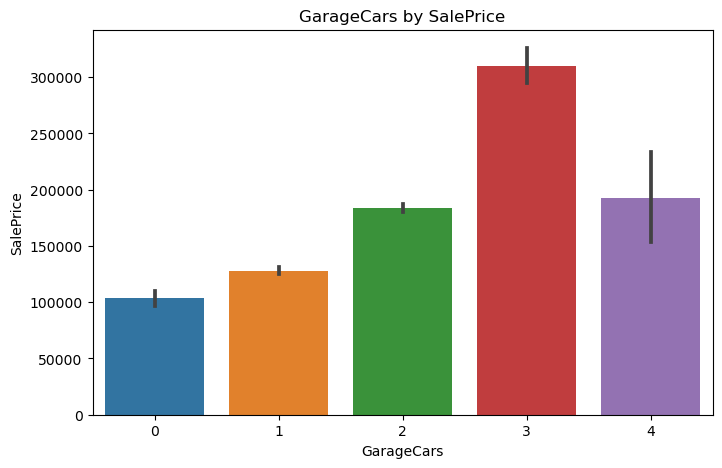

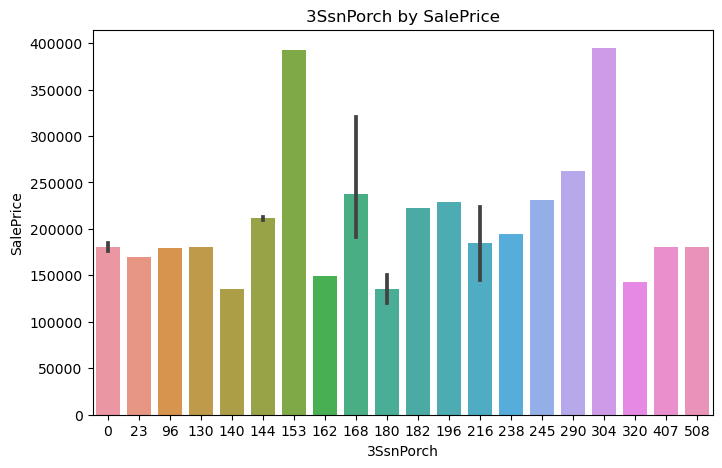

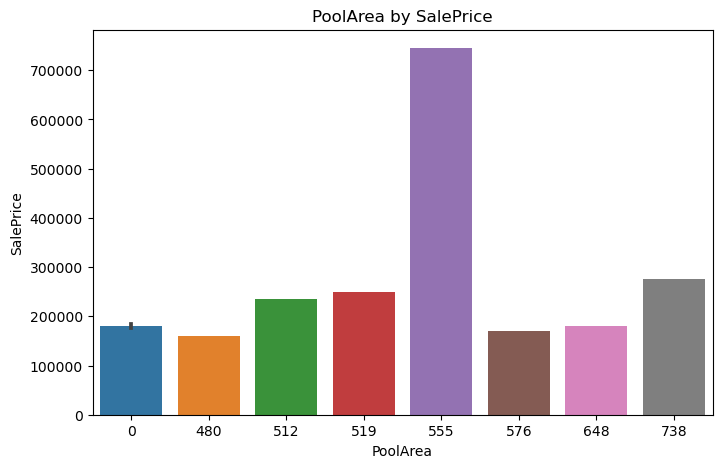

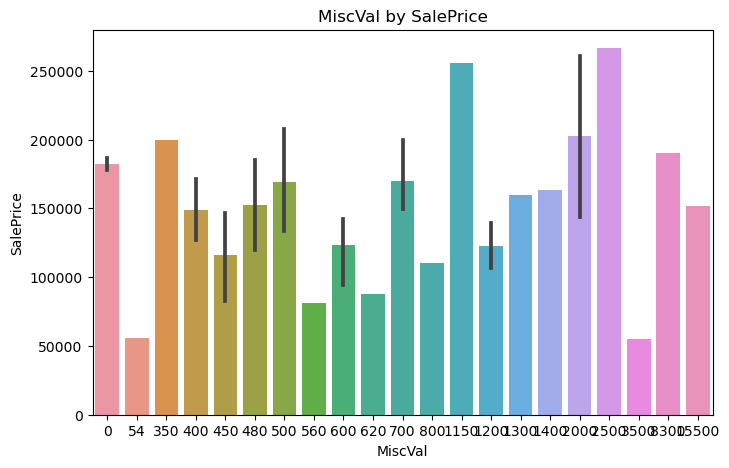

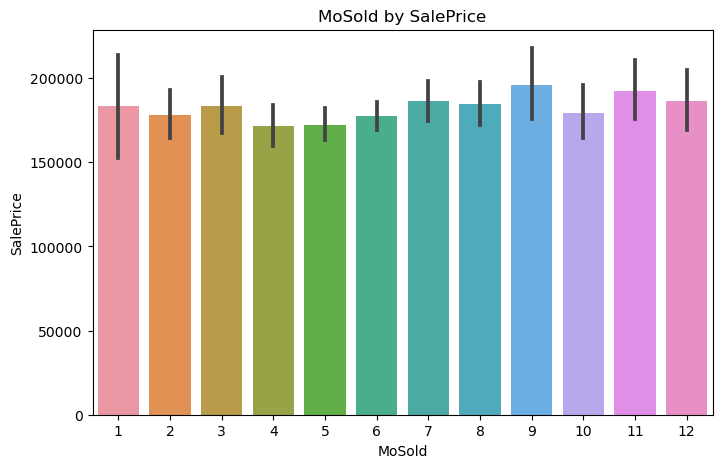

In [39]:
#visualizing discrete features by saleprice
for feature in discrete_feature:
    #fig, ax = plt.subplots(1, 2, figsize=(15,5))
    plt.figure(figsize=(8,5))
    sns.barplot(data=df_train, x=feature, y='SalePrice')
    plt.title(f"{feature} by SalePrice")
    plt.show()

### Conclusion:
<ul>
    <li>House having 2 BsmtFullBath have more saleprice. (but most of the house have 0 BsmtFullBath.)</li>
    <li>House having 3 FullBath have more saleprice. (but most of the house have 1 or 2 FullBath.)</li>
    <li>Houses having 0 or 4 bedroom have highest saleprice. (and most house have 3 bedroom.)</li>
    <li>Houses having 1 kitchen have highest saleprice. (and most house have 1 kitchen.)</li>
</ul>
<i>BsmtFullBath: Basement full bathrooms, FullBath: Full bathrooms above grade, BedroomAbvGr: the no. of bedroom above-grade, KitchenAbvGr: the no. of kitchens above-grade<i>

In [40]:
#extracting all continues features
continues_feature = [feature for feature in numerical_feature if feature not in discrete_feature + year_feature]
continues_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

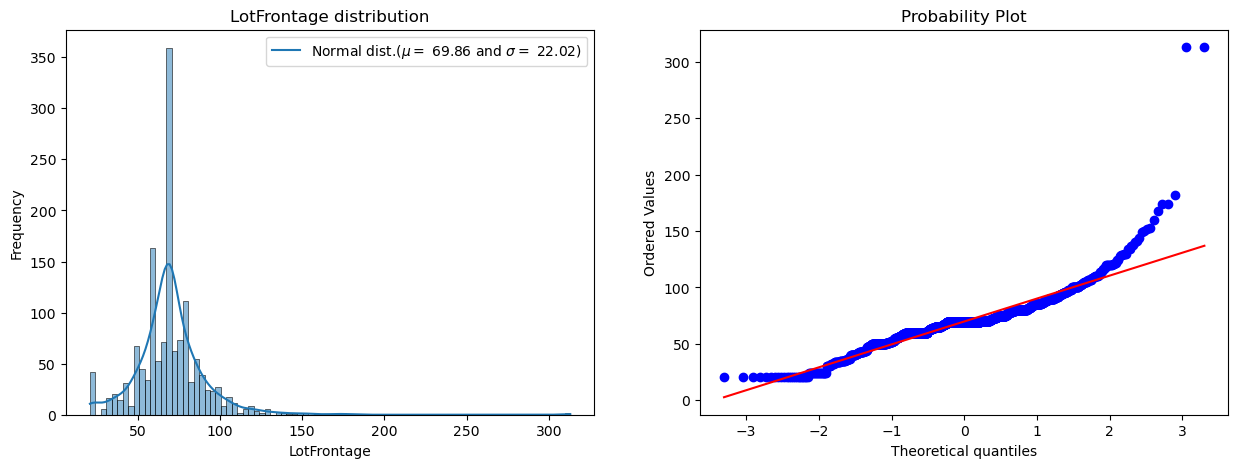

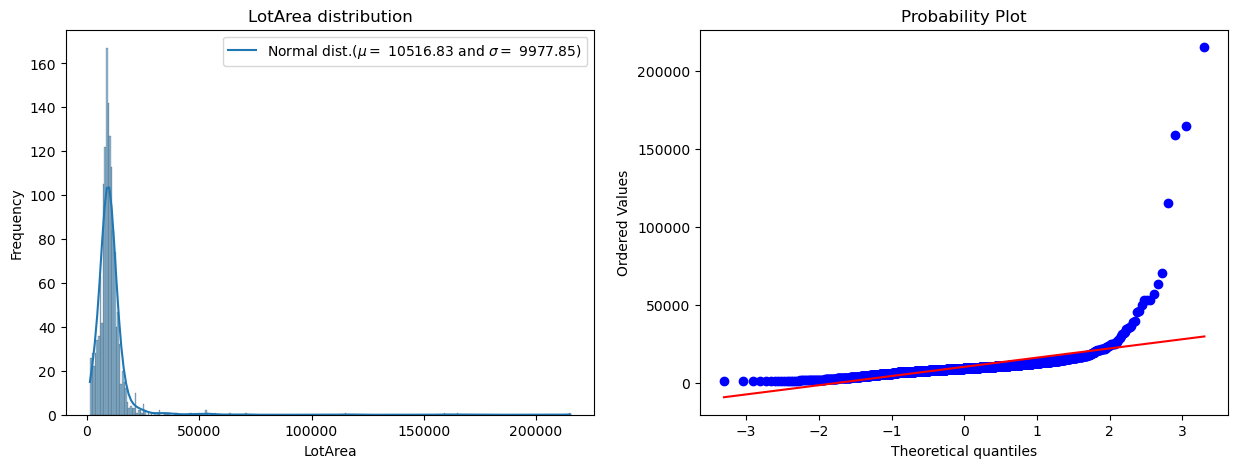

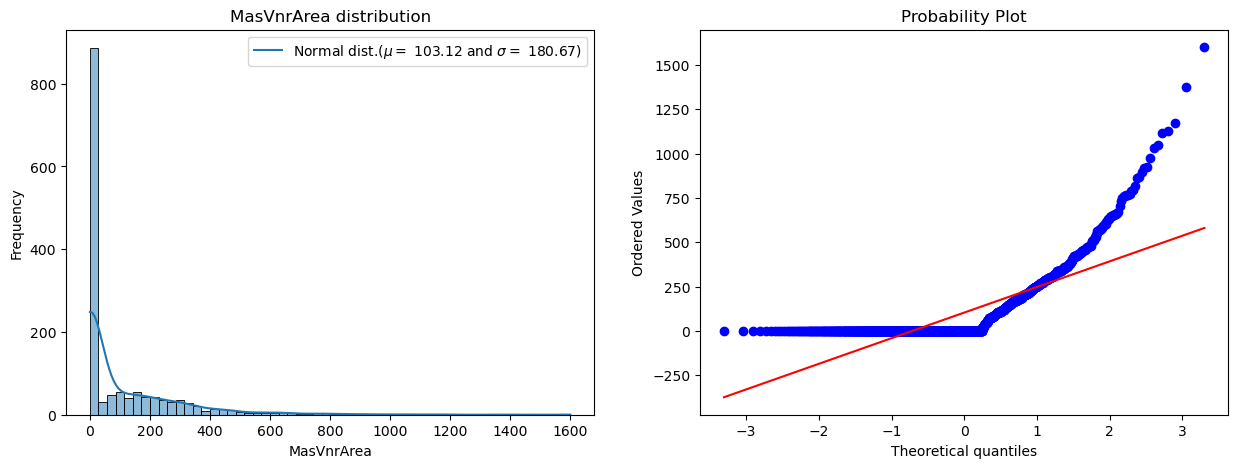

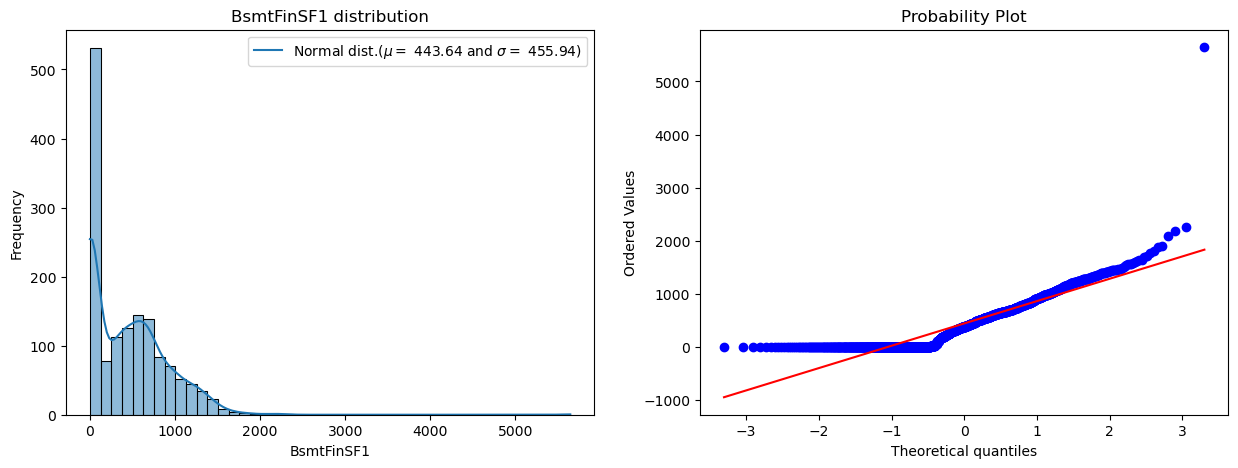

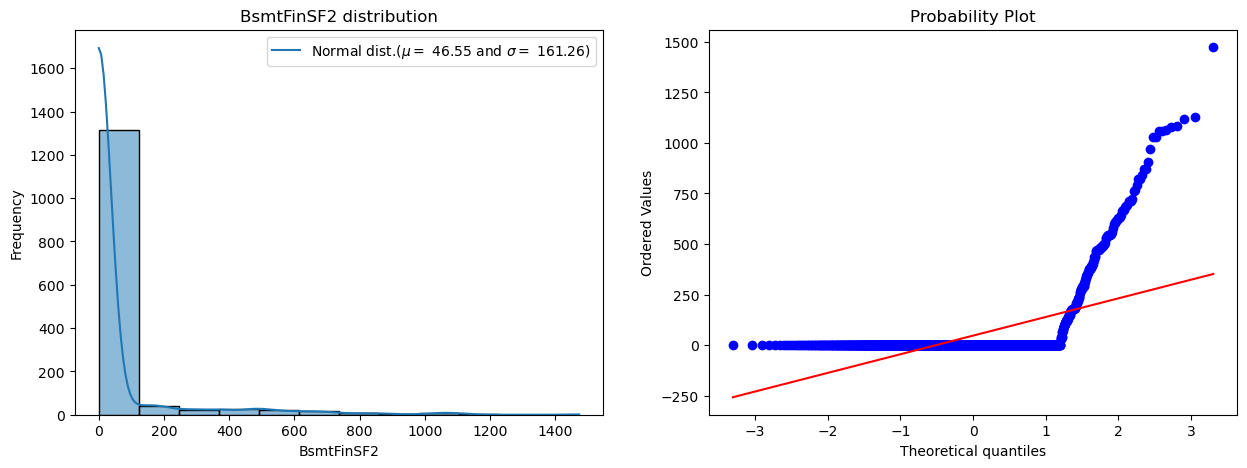

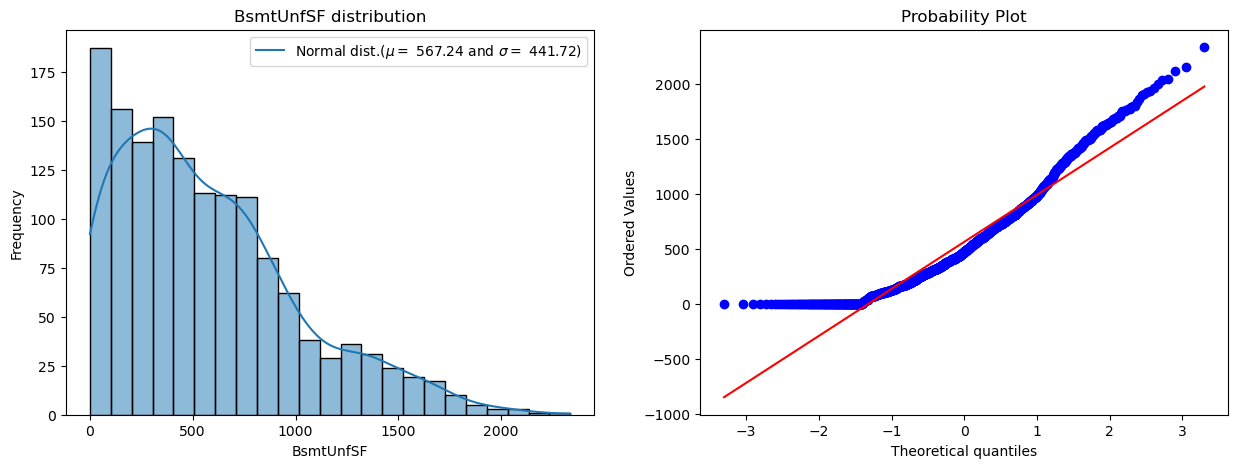

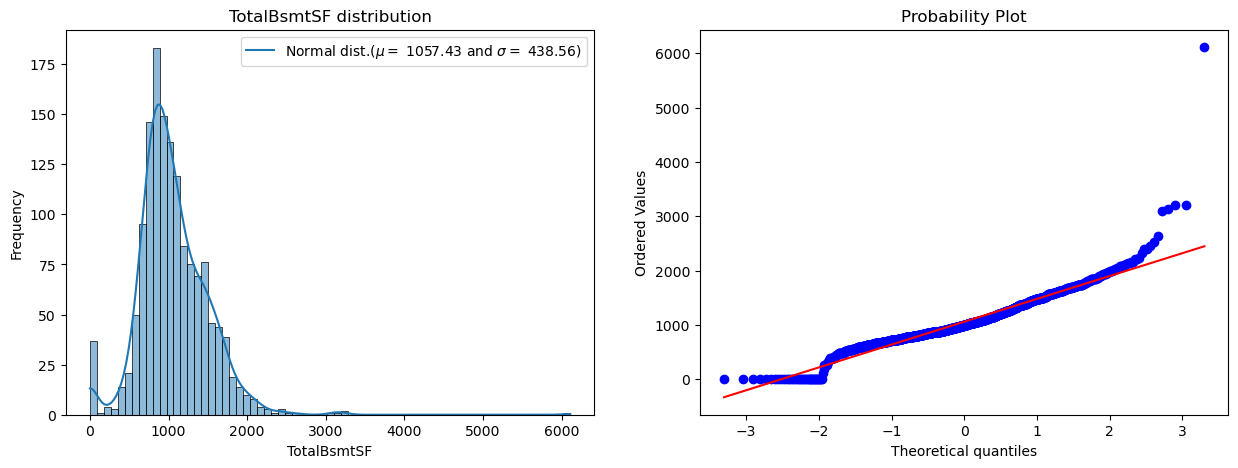

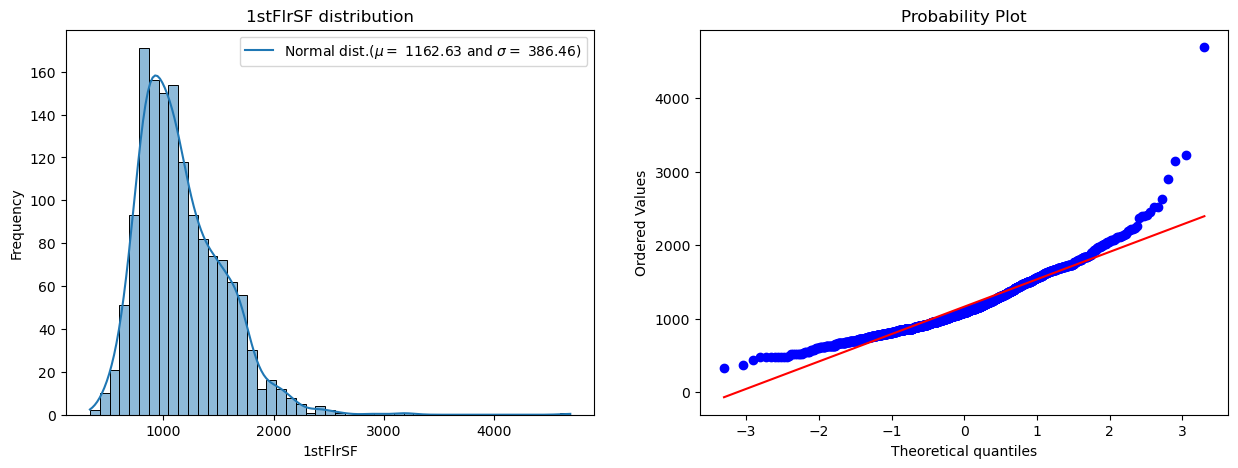

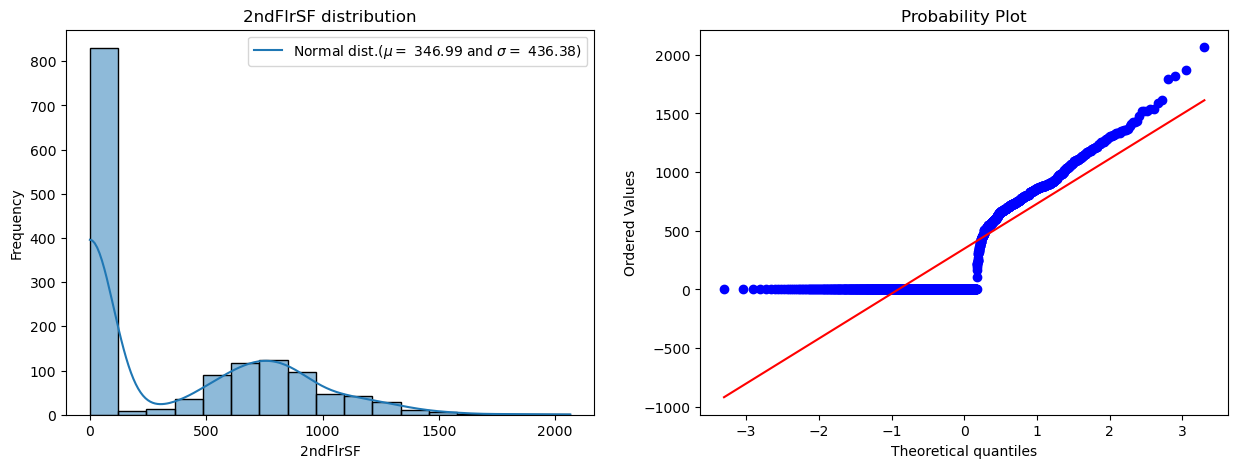

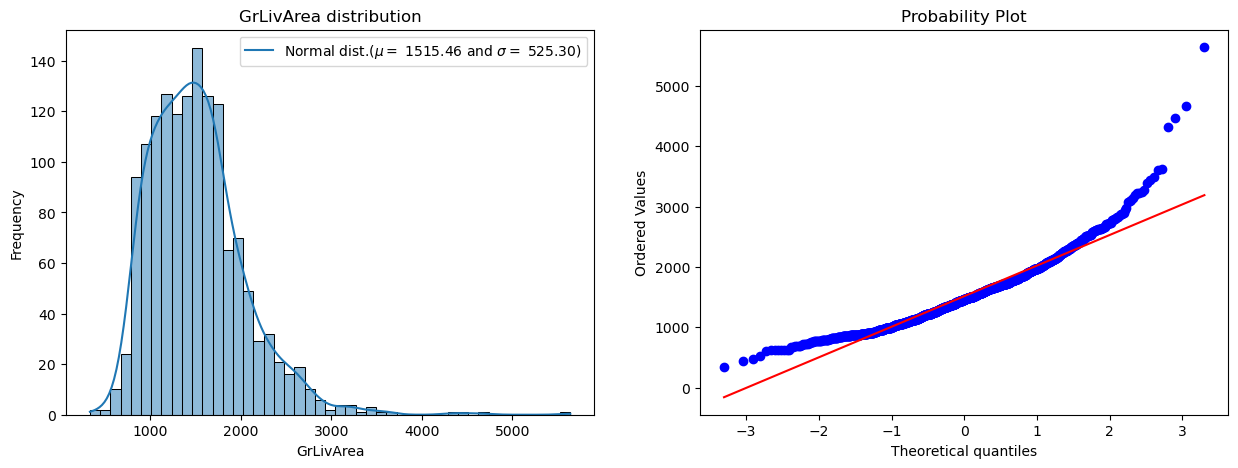

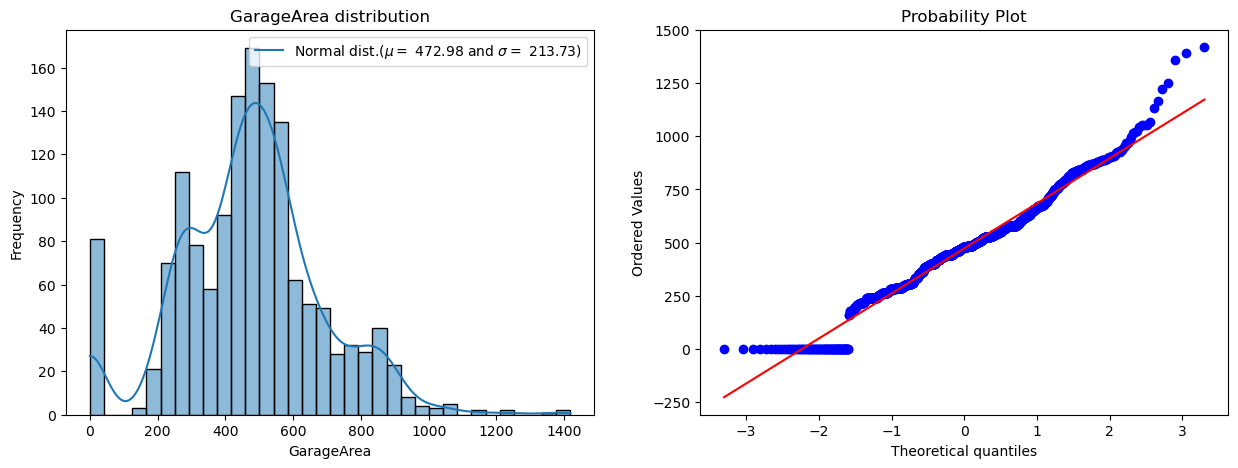

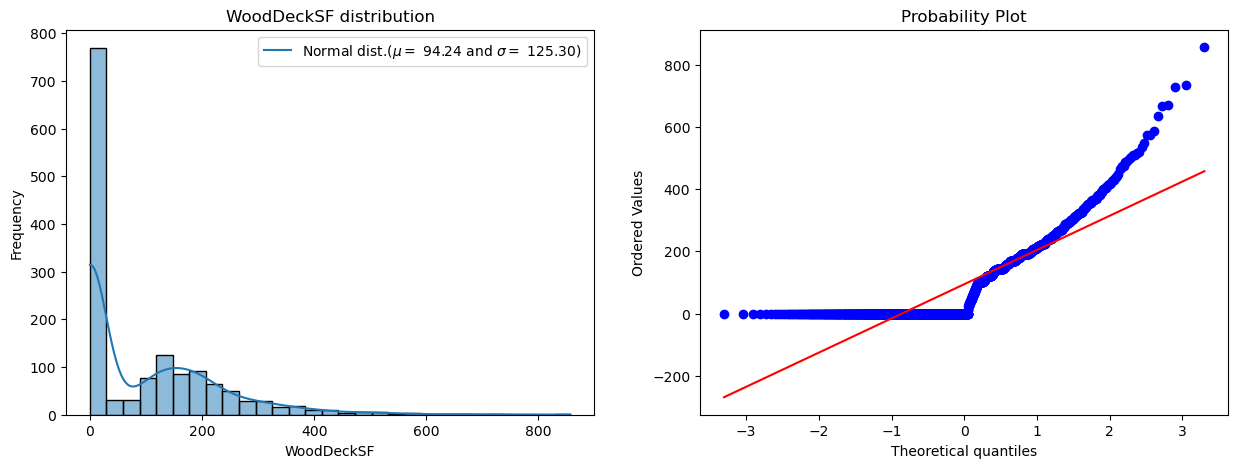

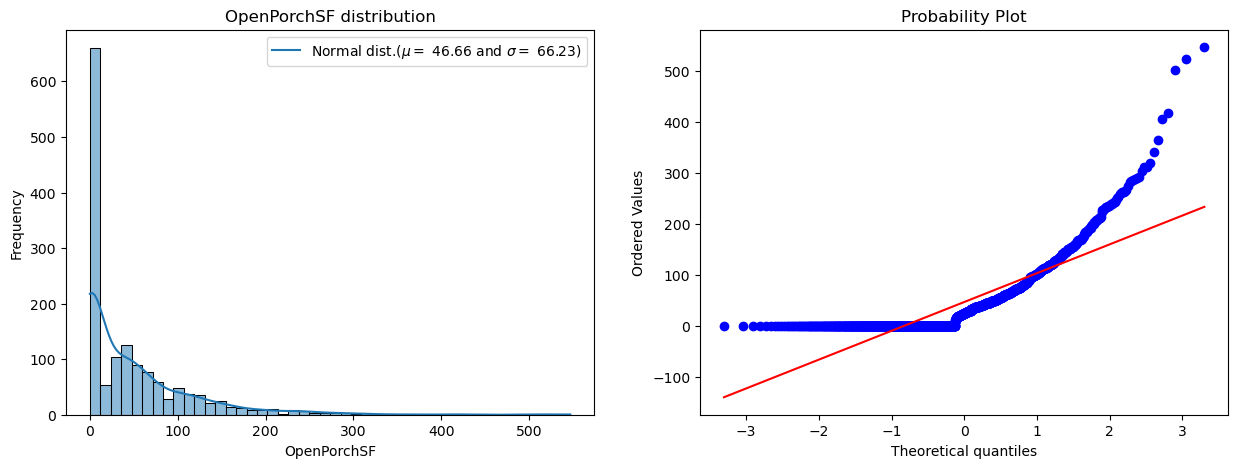

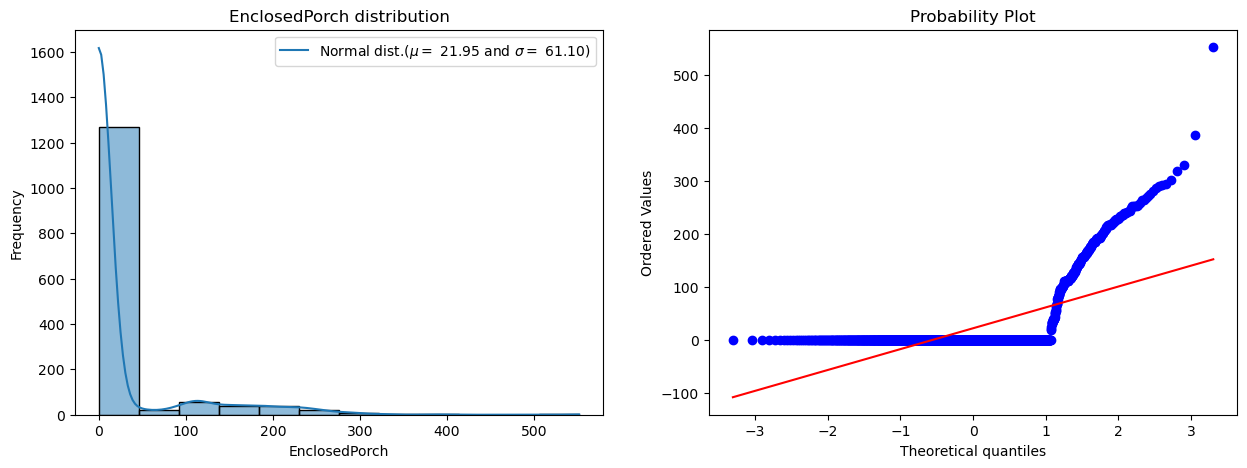

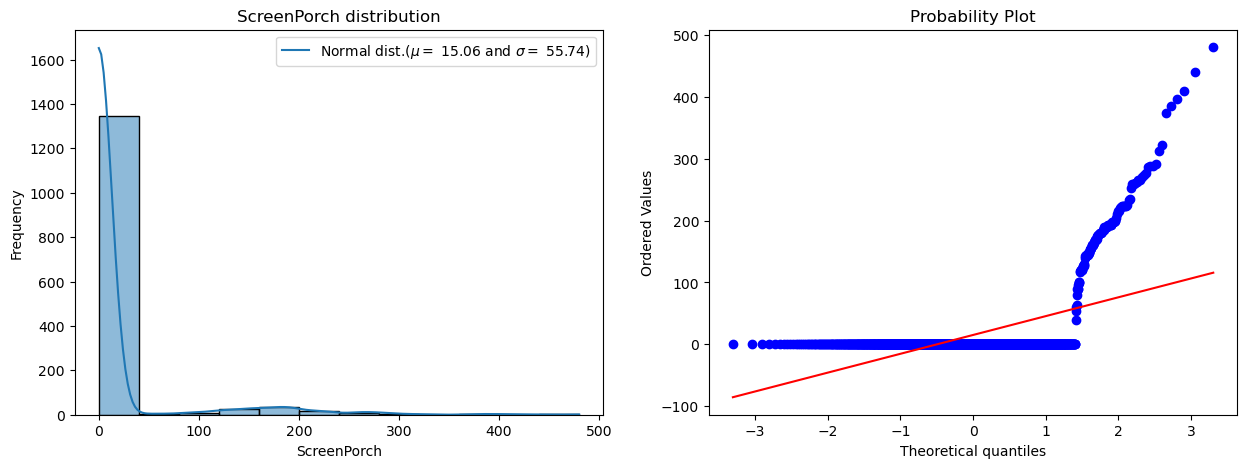

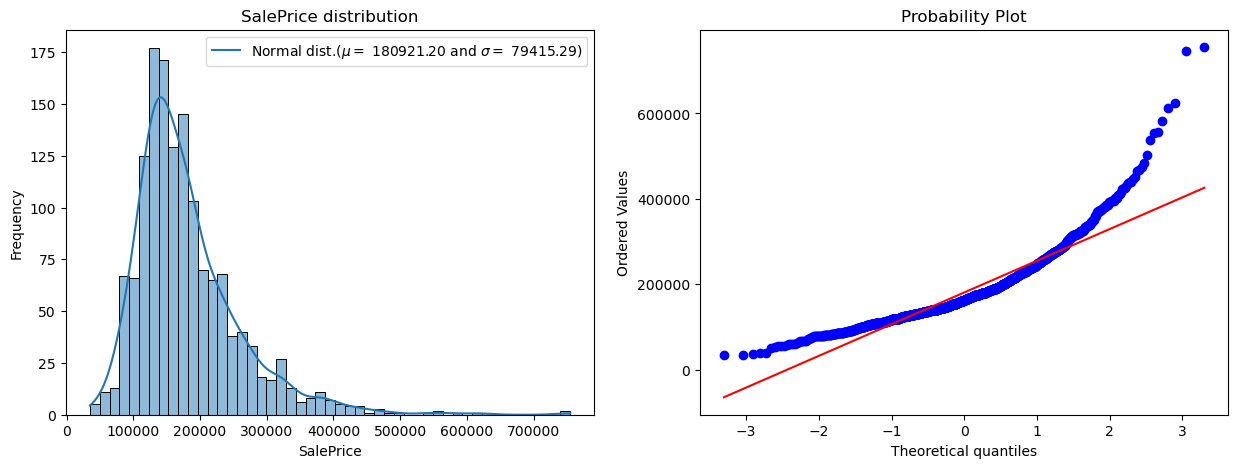

In [41]:
# Visualizing continues features
for feature in continues_feature:
    temp_df=df_train.copy()
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    sns.histplot(data=df_train, x=feature, ax=ax[0], kde=True, common_norm=True)
    (mu,sigma)=norm.fit(df_train[feature])
    ax[0].legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title(f"{feature} distribution")
    res=stats.probplot(df_train[feature],plot=plt)
    plt.show()

As we can see in the graph, the data is not normally distributed and the linear models expect the data to be normally distributed, Hence we need to transform the data.

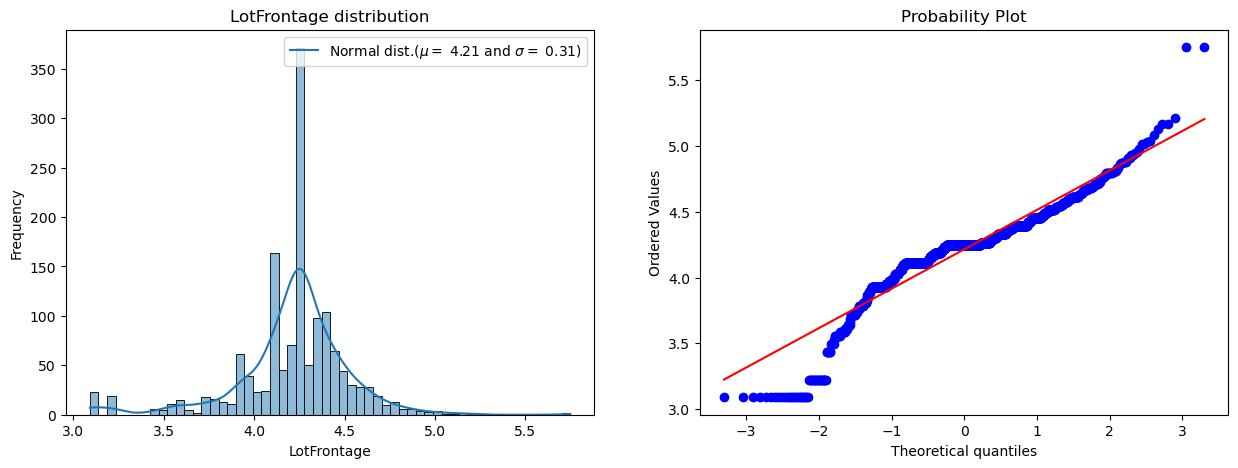

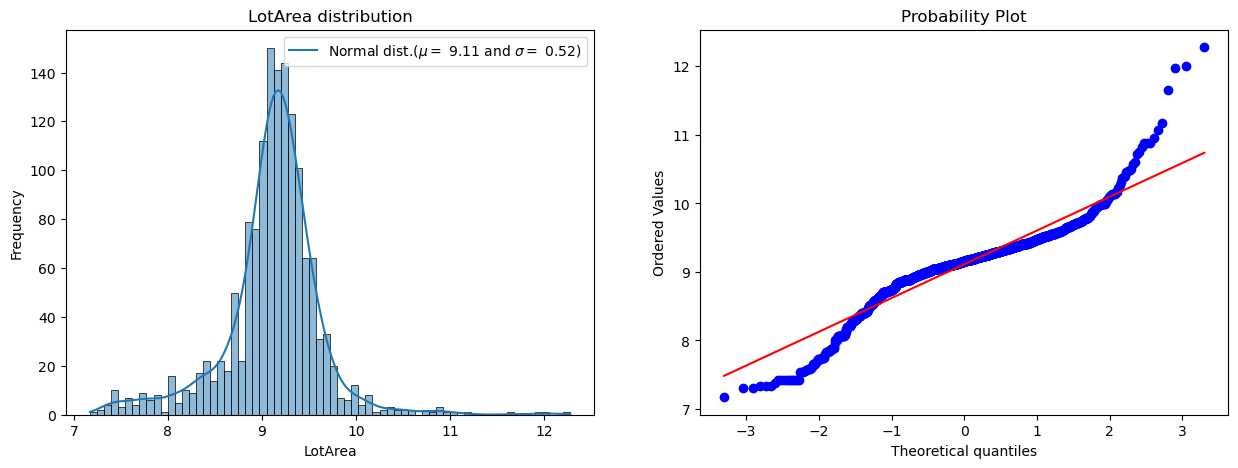

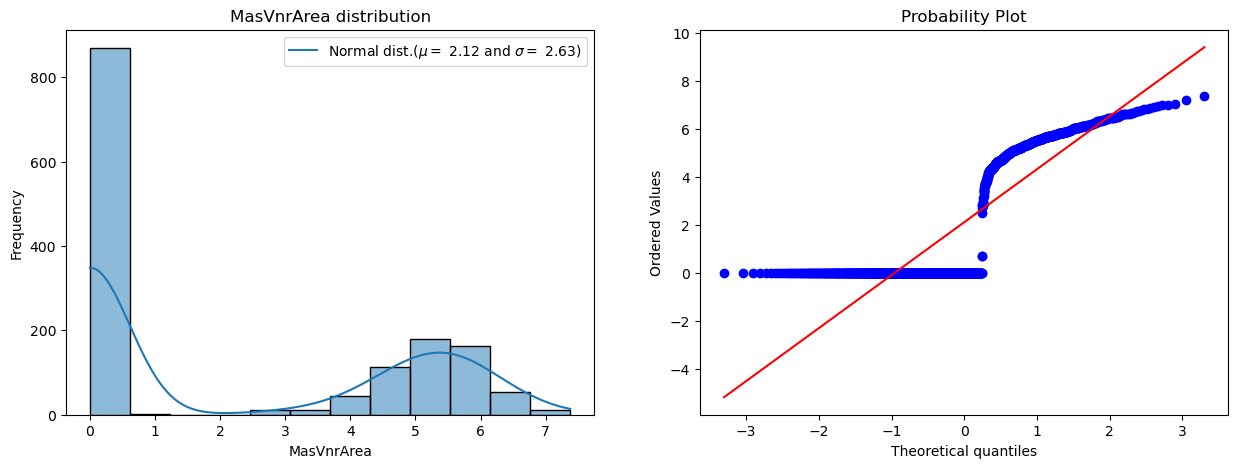

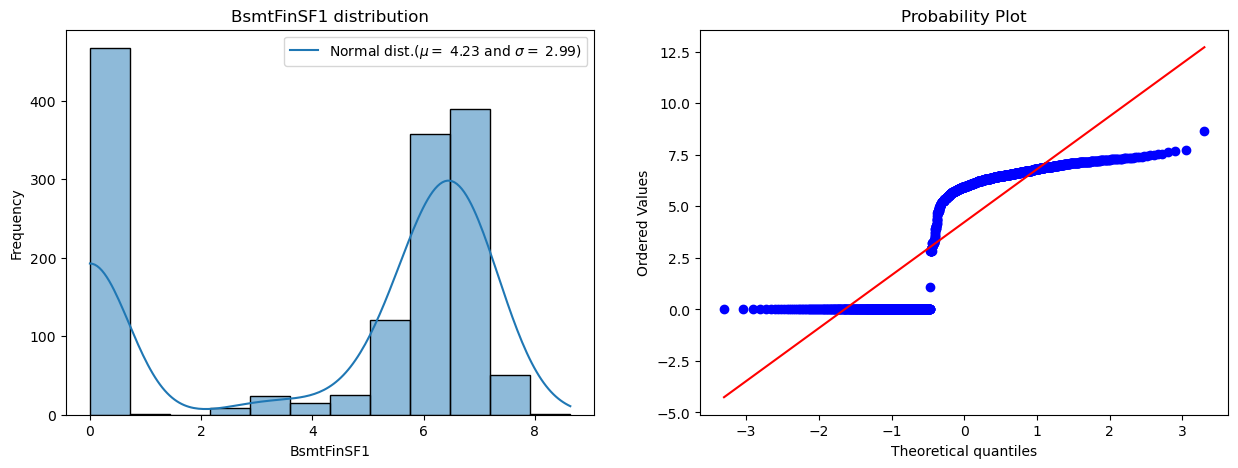

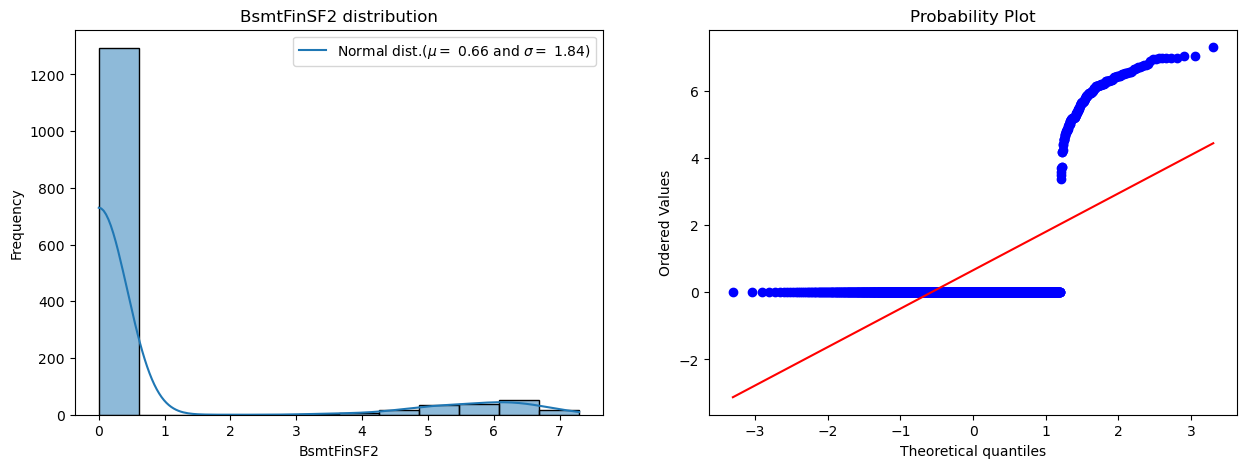

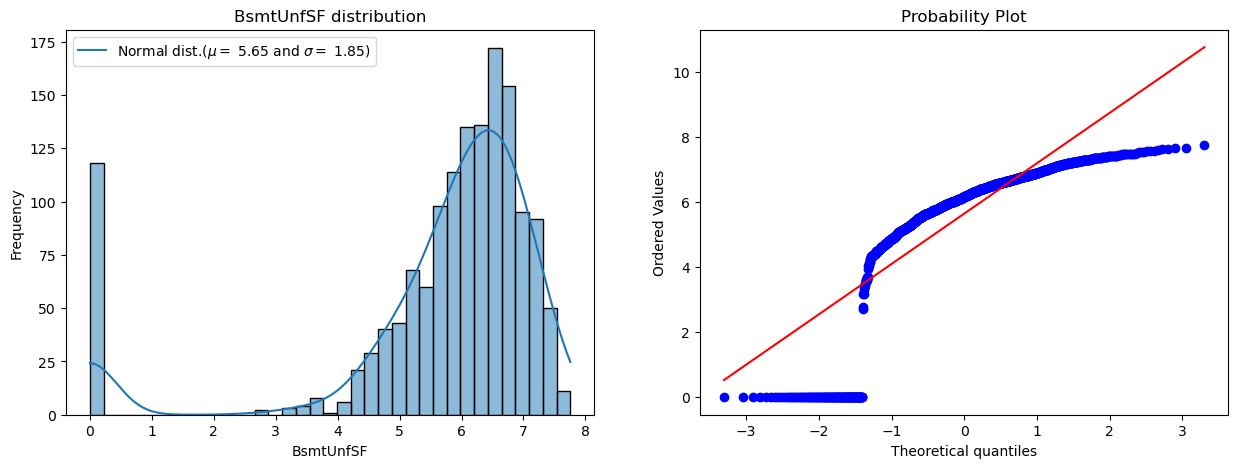

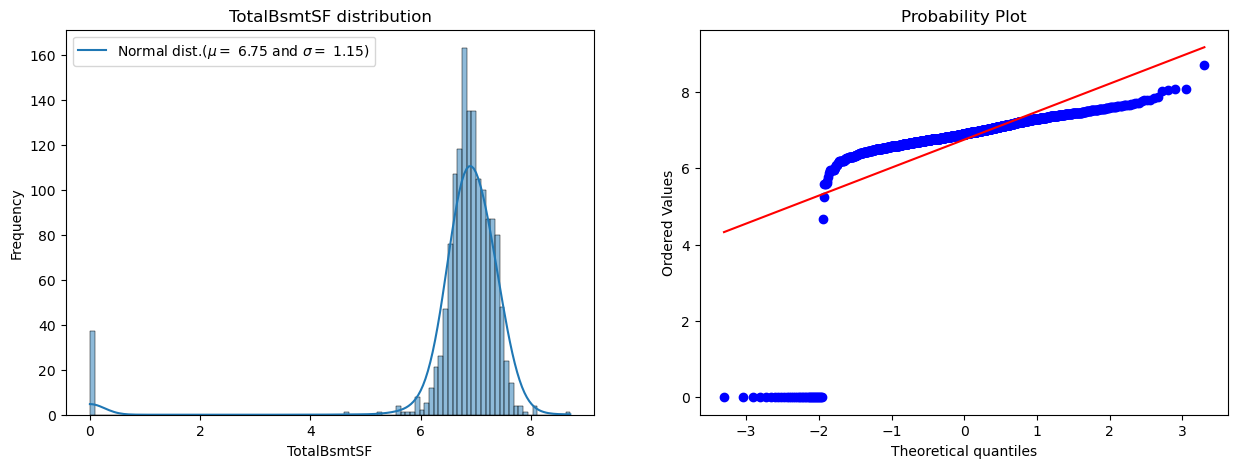

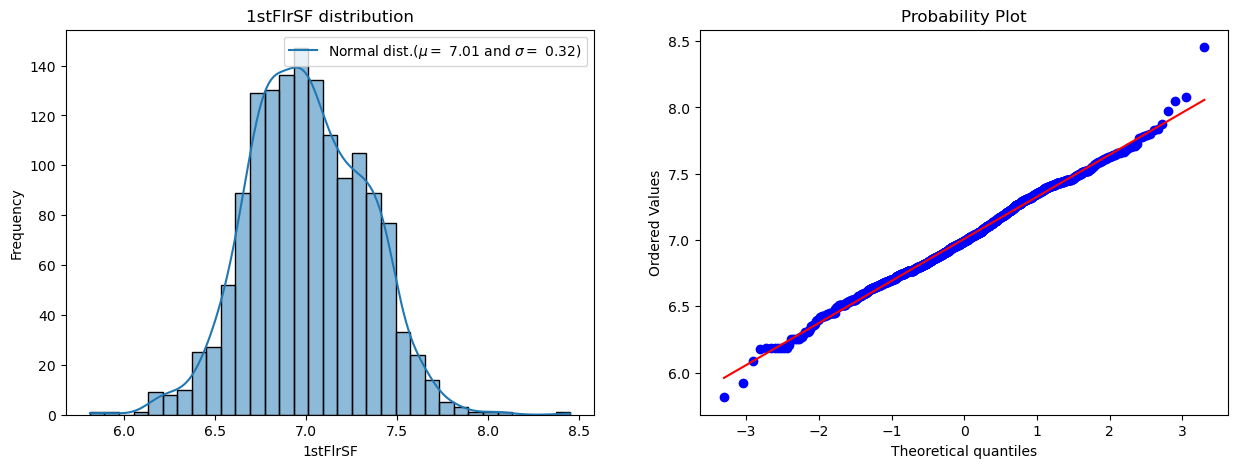

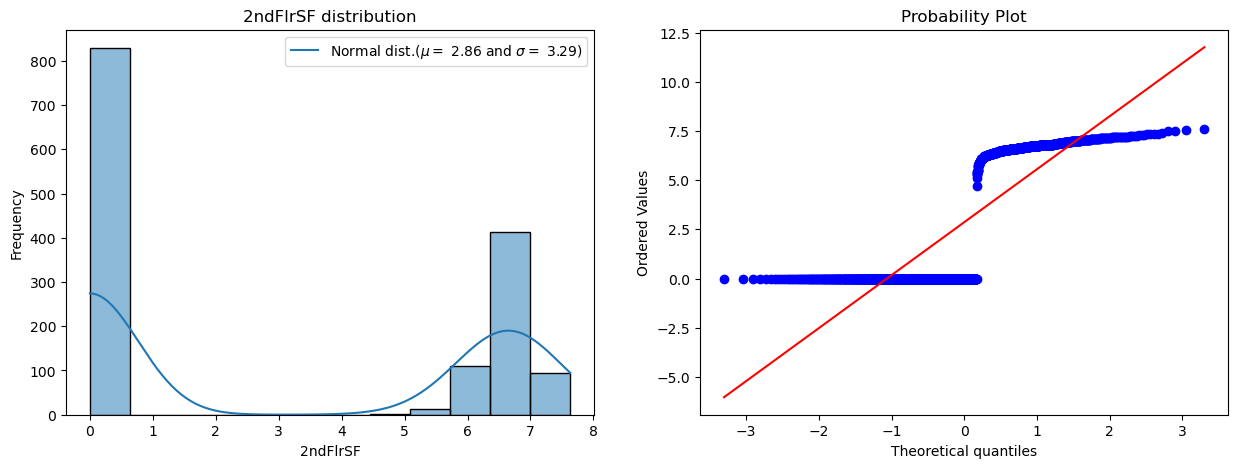

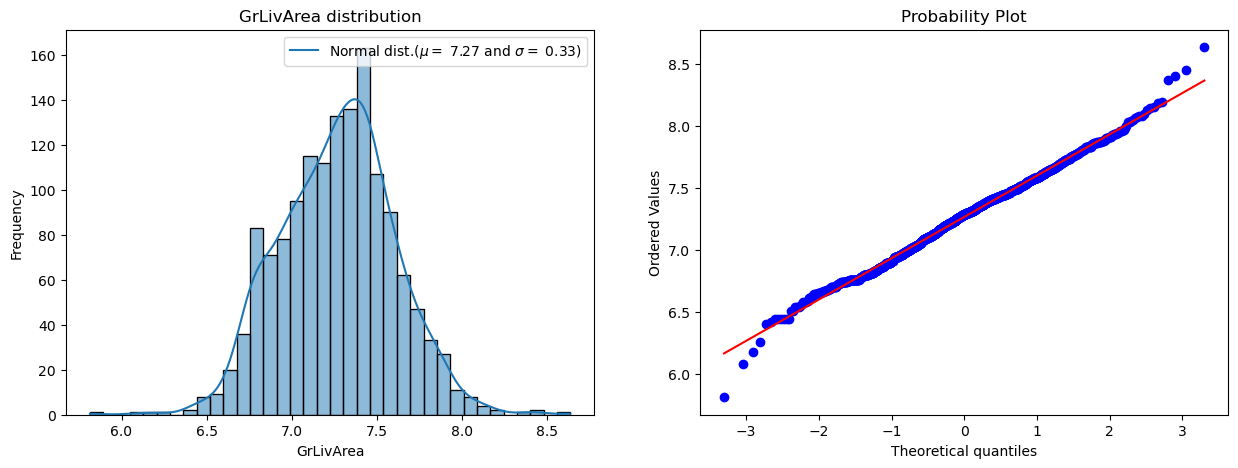

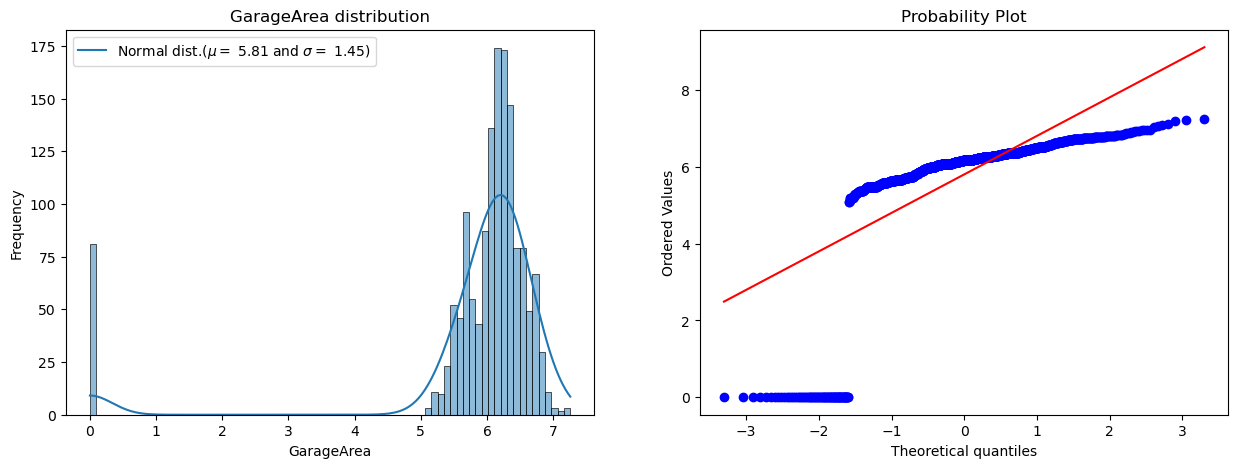

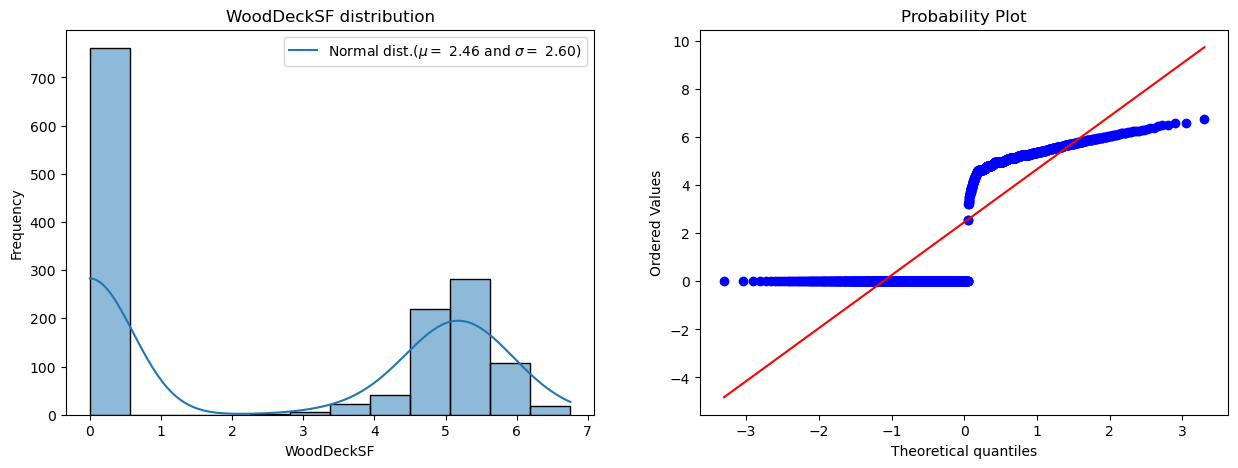

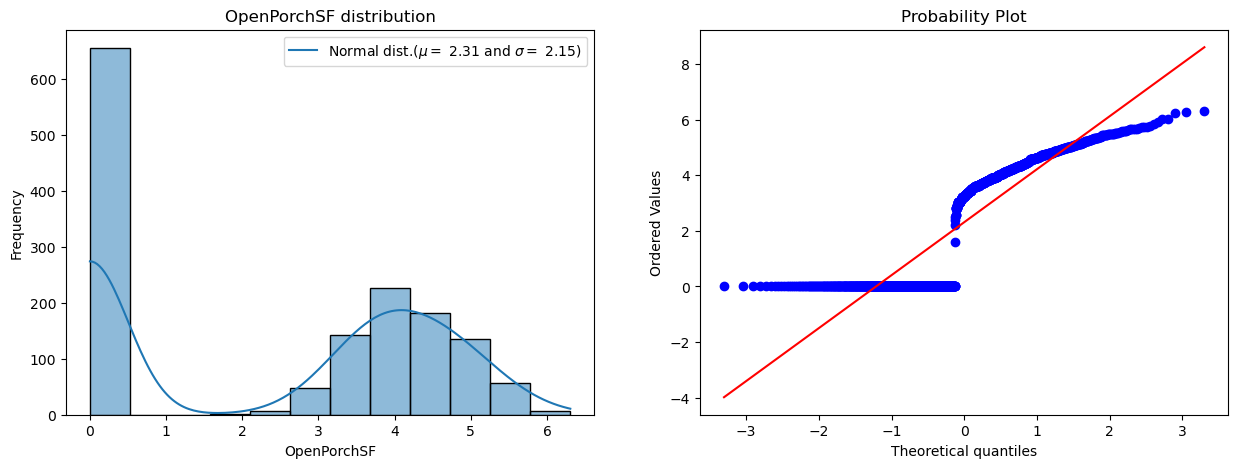

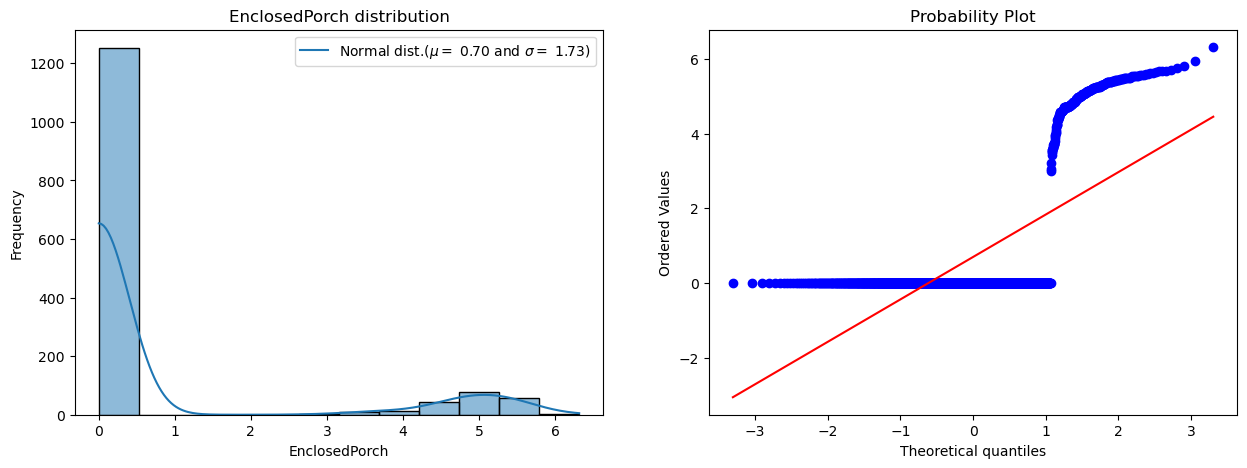

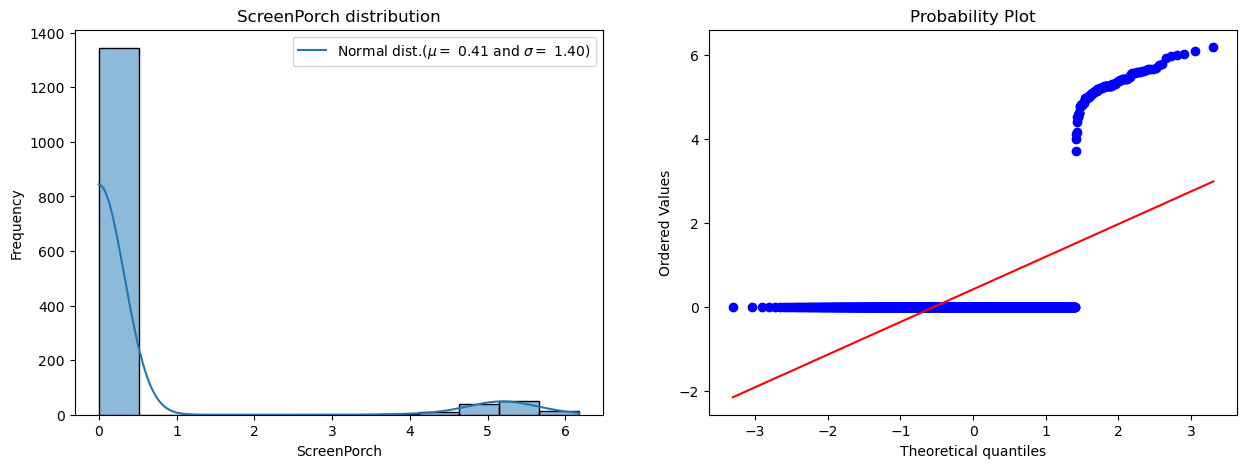

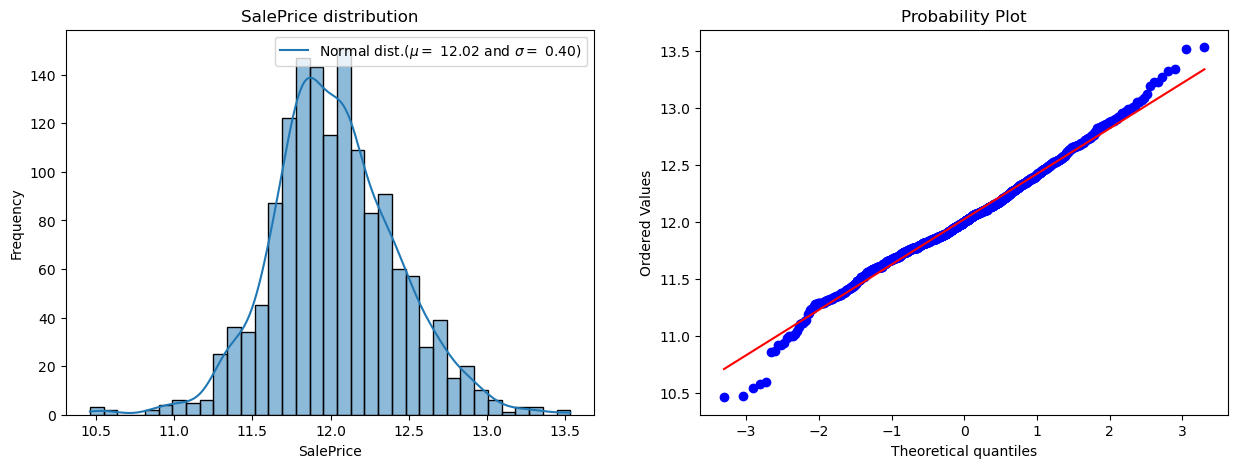

In [42]:
#visualizing normally distributed continues feature
for feature in continues_feature:
    temp_df=df_train.copy()
    temp_df[feature]=np.log1p(temp_df[feature])
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    sns.histplot(data=temp_df, x=feature, ax=ax[0], kde=True, common_norm=True)
    (mu,sigma)=norm.fit(temp_df[feature])
    ax[0].legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title(f"{feature} distribution")
    res=stats.probplot(temp_df[feature],plot=plt)
    plt.show()

### Conclusion:
Now, all continues features are now normally distributed.

Now let us see correlation of OverallQual, GrLivArea, 1ndFlrSF, 2ndFlrSF,GarageCars, GarageArea with SalePrice.

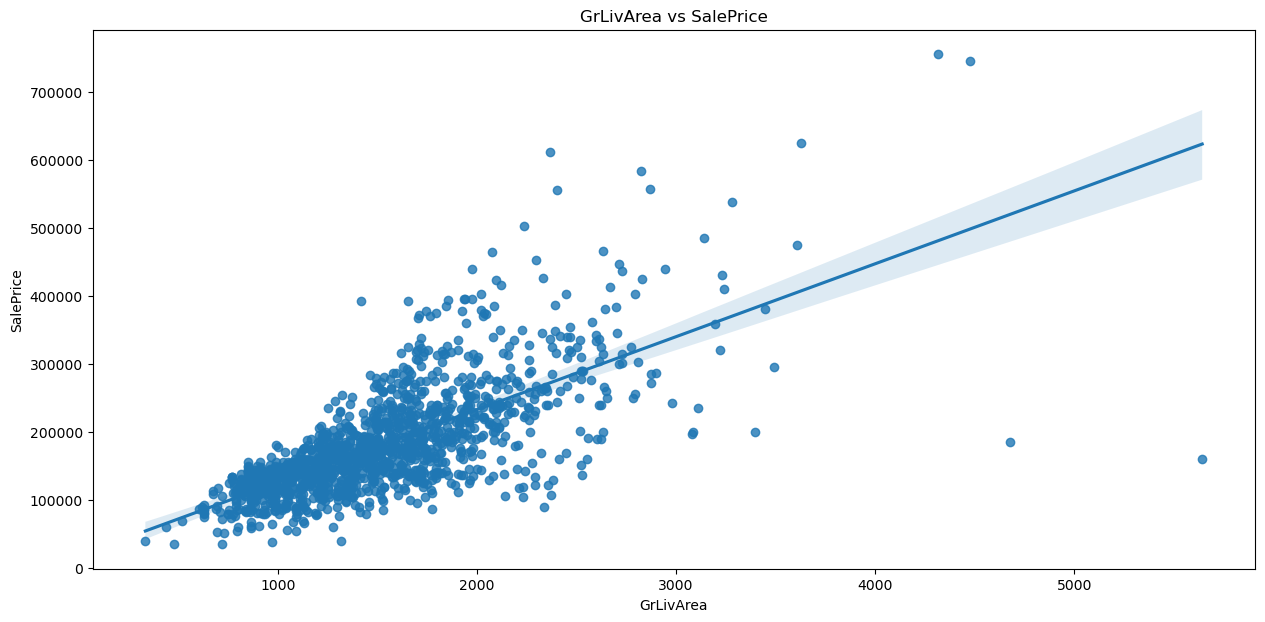

In [43]:
#The correlation between GrLivArea and SalePrice
plt.figure(figsize=(15,7))
sns.regplot(data=df_train,x='GrLivArea',y='SalePrice')
plt.title('GrLivArea vs SalePrice')
plt.show()

### Conclusion:
<ul>
    <li>SalePrice and GrLivArea have a roughly Linear correlation.</li>
    <li>The two dots on the top indicate sudden price increase, It may be because the house is located in a hotspot.
    <li>The two dots on the right bottom the SalePrice is less, it could be agriculture land near the city.</li>
</ul>

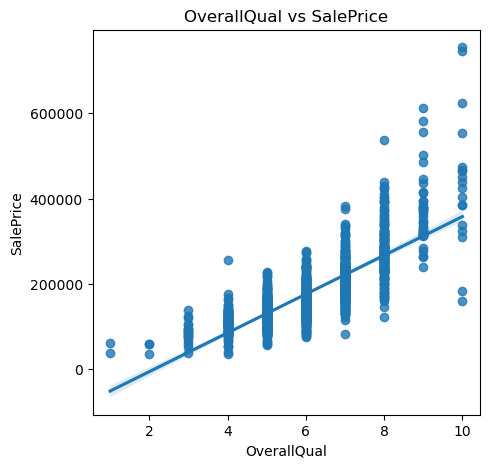

In [44]:
#OverallQual(Overall material and finish quality) by saleprice
plt.figure(figsize=(5,5))
sns.regplot(data=df_train,x='OverallQual',y='SalePrice')
plt.title('OverallQual vs SalePrice')
plt.show()

### Conclusion:
As we can see in the above plot that OverallQual clearly shows linear relationship between SalePrice and OverallQual.

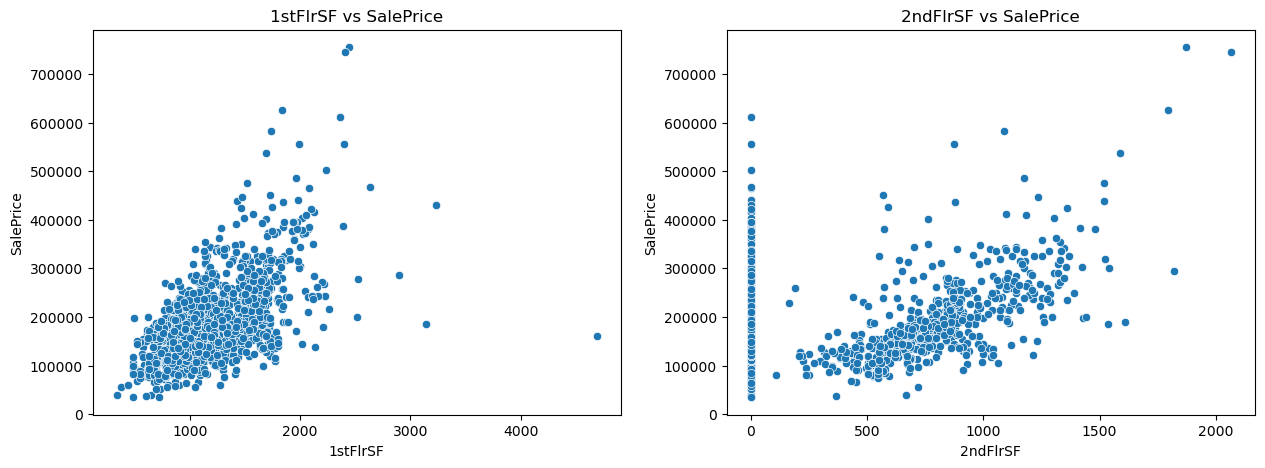

In [45]:
#The correlation between 1stFlrSF and 2ndFlrSF w.r.t SalePrice
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_train,x='1stFlrSF',y='SalePrice')
plt.title('1stFlrSF vs SalePrice')
plt.subplot(1,2,2)
sns.scatterplot(data=df_train,x='2ndFlrSF',y='SalePrice')
plt.title('2ndFlrSF vs SalePrice')
plt.show()

### Conclusion:
1stFlrSF and SalePrice have good linear correlation.

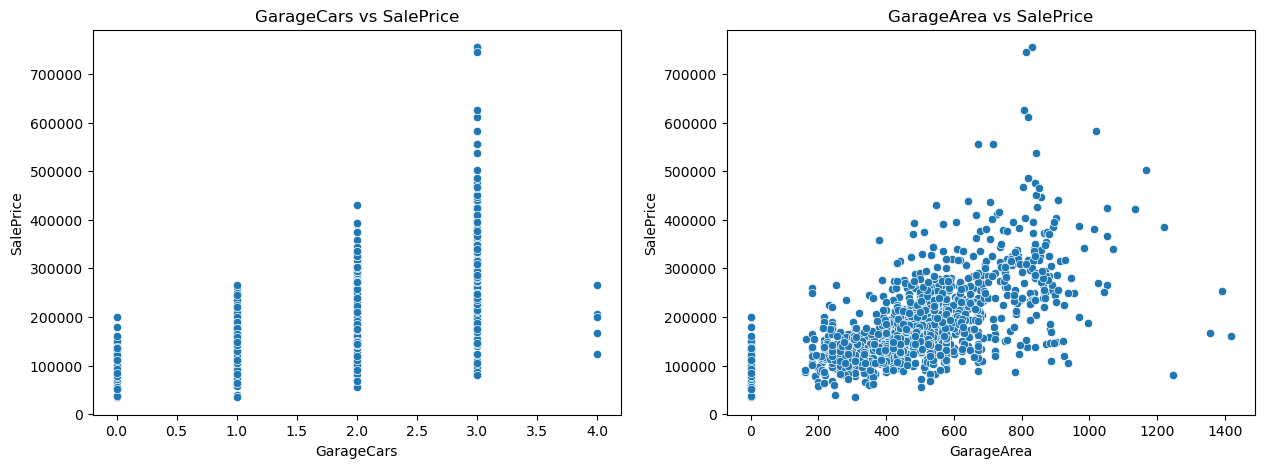

In [46]:
#The correlation between GarageCars and GarageArea w.r.t SalePrice
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_train,x='GarageCars',y='SalePrice')
plt.title('GarageCars vs SalePrice')
plt.subplot(1,2,2)
sns.scatterplot(data=df_train,x='GarageArea',y='SalePrice')
plt.title('GarageArea vs SalePrice')
plt.show()

### Conclusion:
GarageCars and SalePrice have good linear correlation.

### Categorical features

In [47]:
#extracting all Categorical features
categorical_feature=[features for features in df_train.select_dtypes(exclude = ['number']).columns]
categorical_feature

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

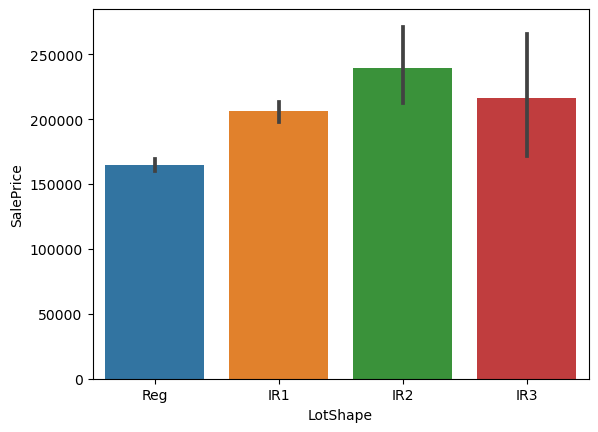

In [48]:
#lotshape(General shape of property) by saleprice
sns.barplot(data=df_train,x='LotShape',y='SalePrice')

### Conclusion:
<ul>
    <li>IR2 has a highest saleprice</li>
    <li>IR3 has second highest saleprice</li>
</ul>
<i>Reg-regular, IR3-irregular, IR2-Moderately Irregular</i>

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

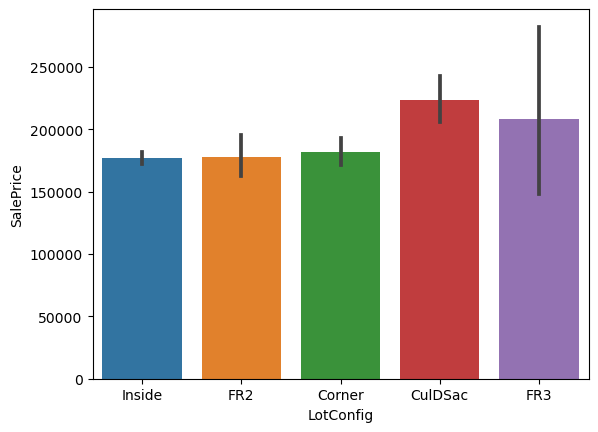

In [49]:
#lotconfig(Lot configuration) by saleprice
sns.barplot(data=df_train,x='LotConfig',y='SalePrice')

### Conclusion:
<ul>
    <li>CulDSac LotConfig has highest SalesPrice.</li>
    <li>FR3 LotConfig has second highest SalesPrice.</li>
</ul>
<i><b>Cul-de-sac lot:</b> a lot facing the rounded turn-around portion of a dead-end street. A cul-de-sac property is private since it is not subject to through traffic. Unlike rectangular lots, the cul-de-sac lot has a small front yard which is offset by a larger backyard.<br>
<b>Fr3:</b> Frontage on 3 sides of property</i>


<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

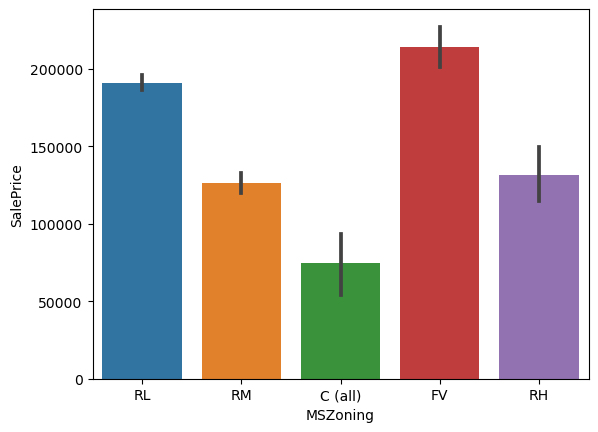

In [50]:
#MSZoning(he general zoning classification) by saleprice
sns.barplot(data=df_train,x='MSZoning',y='SalePrice')

### Conclusion:
<ul>
    <li>FV has highest SalesPrice.</li>
    <li>RL has second highest SalesPrice.</li>
  
</ul>
<i>RL-Residential Low Density, RM-Residential Medium Density,</i>
<i>FV-Floating Village Residential 


<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

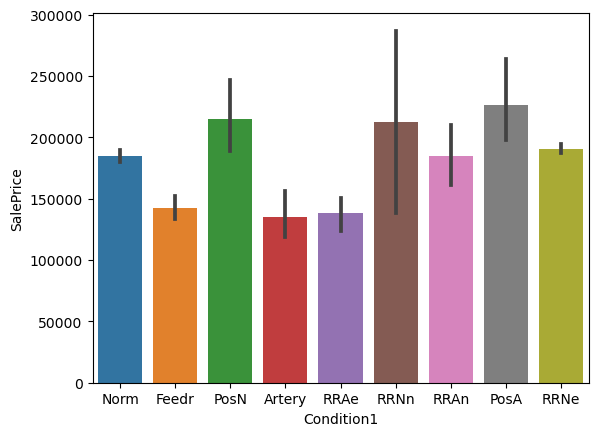

In [51]:
#Condition (Condition1: Proximity to various conditions) by saleprice
sns.barplot(data=df_train,x='Condition1',y='SalePrice')

### Conclusion:
<ul>
    <li>PosA has highest SalesPrice.</li>
    <li>PosN has second highest SalesPrice.</li>
</ul>
<i>PosN-Near positive off-site feature--park, greenbelt, etc.<br>
   PosA-Adjacent to postive off-site feature</i>

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

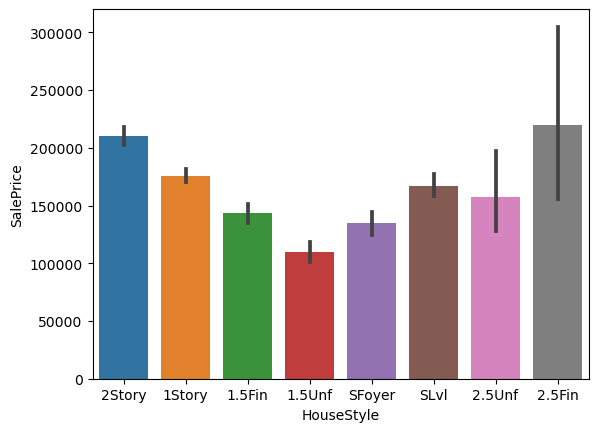

In [52]:
#HouseStyle(HouseStyle: Style of dwelling) by saleprice 
sns.barplot(data=df_train,y='SalePrice',x='HouseStyle')

### Conclusion:
<ul>
    <li>2.5Fin has a highest saleprice</li>
    <li>2Story has  second highest saleprice</li>
</ul>
<i>2Story-Two story<br>
   2.5Fin-Two and one-half story: 2nd level finished</i>

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

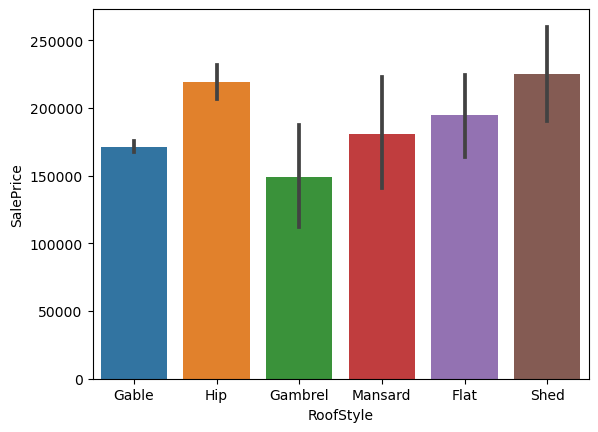

In [53]:
#RoofStyle(RoofStyle: Type of roof) by SalePrice 
sns.barplot(data=df_train,x='RoofStyle',y='SalePrice')

### Conclusion:
<ul>
    <li>Shed RoofStyle has highest SalesPrice.</li>
    <li>Hip RoofStyle has second highest SalesPrice.</li>
</ul>

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

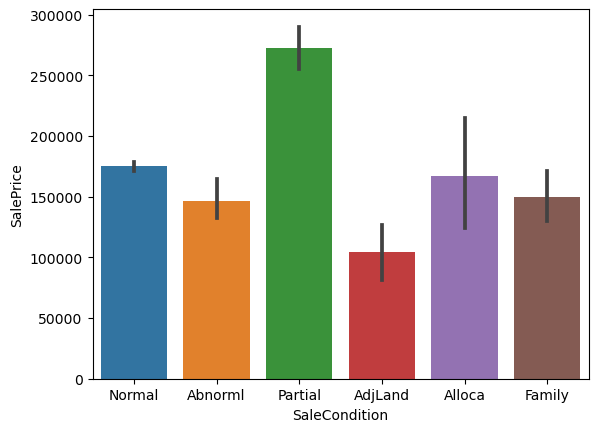

In [54]:
#SaleCondition(Condition of sale) by saleprice
sns.barplot(data=df_train,x='SaleCondition',y='SalePrice')

### Conclusion:
<ul>
    <li>Partial has highest saleprice</li>
</ul>

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

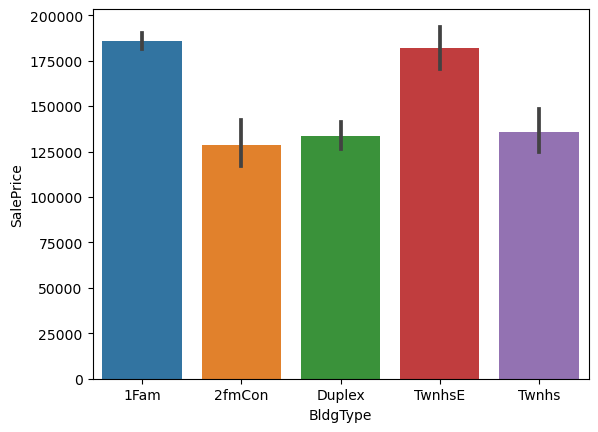

In [55]:
#BldgType(Type of dwelling) by SalePrice
sns.barplot(data=df_train,x='BldgType',y='SalePrice')

### Conclusion:
<ul>
    <li>1Fam and TwnhsE has highest saleprice</li>
</ul>
<i> 1Fam-Single-family Detached, TwnhsE-Townhouse End Unit</i>

Value count of Exterior1st.

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


Text(0.5, 1.0, 'SalesPrice per Exterior1st')

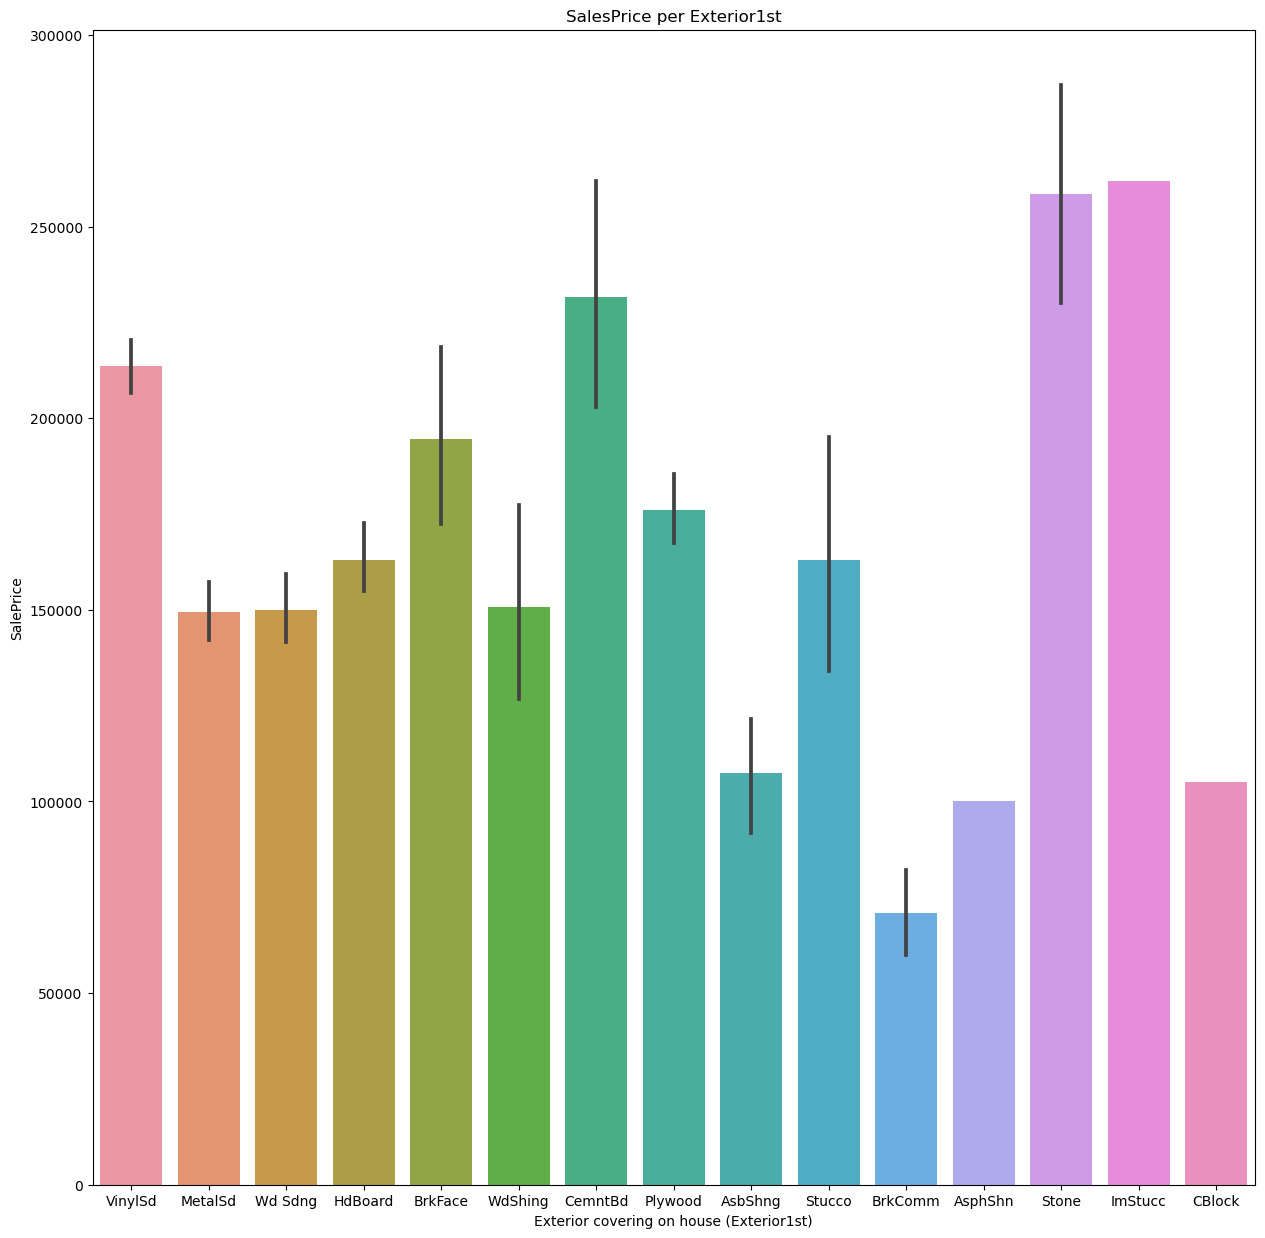

In [56]:
#Exterior1st(Exterior covering on house) by saleprice
print('Value count of Exterior1st.\n')
print(df_train['Exterior1st'].value_counts())
plt.figure(figsize=(15,15))
sns.barplot(data=df_train,x='Exterior1st',y='SalePrice')
plt.xlabel('Exterior covering on house (Exterior1st)')
plt.title('SalesPrice per Exterior1st')

### Conclusion:
<ul>
    <li>ImStucc has highest saleprice</li>
    <li>The most frequent is VinylSd</li>
</ul>
<i>ImStucc-Imitation Stucco, VinylSd-Vinyl Siding</i>

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

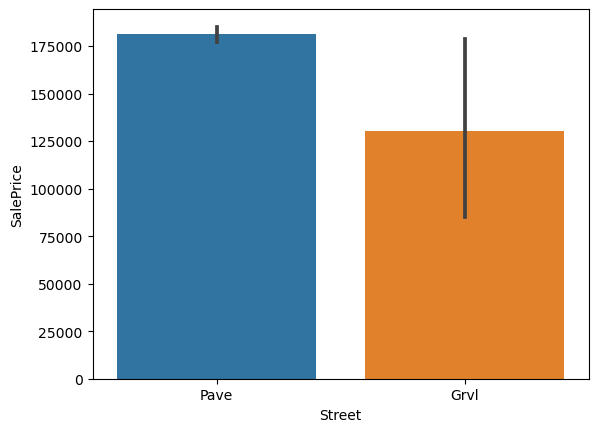

In [57]:
#Street(Type of road access to property) by SalePrice
sns.barplot(data=df_train,y='SalePrice',x='Street')

### Conclusion:
<ul>
    <li>Pave street has a highest saleprice</li>
</ul>
<i>Grvl-Gravel, Pave-Paved</i>

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

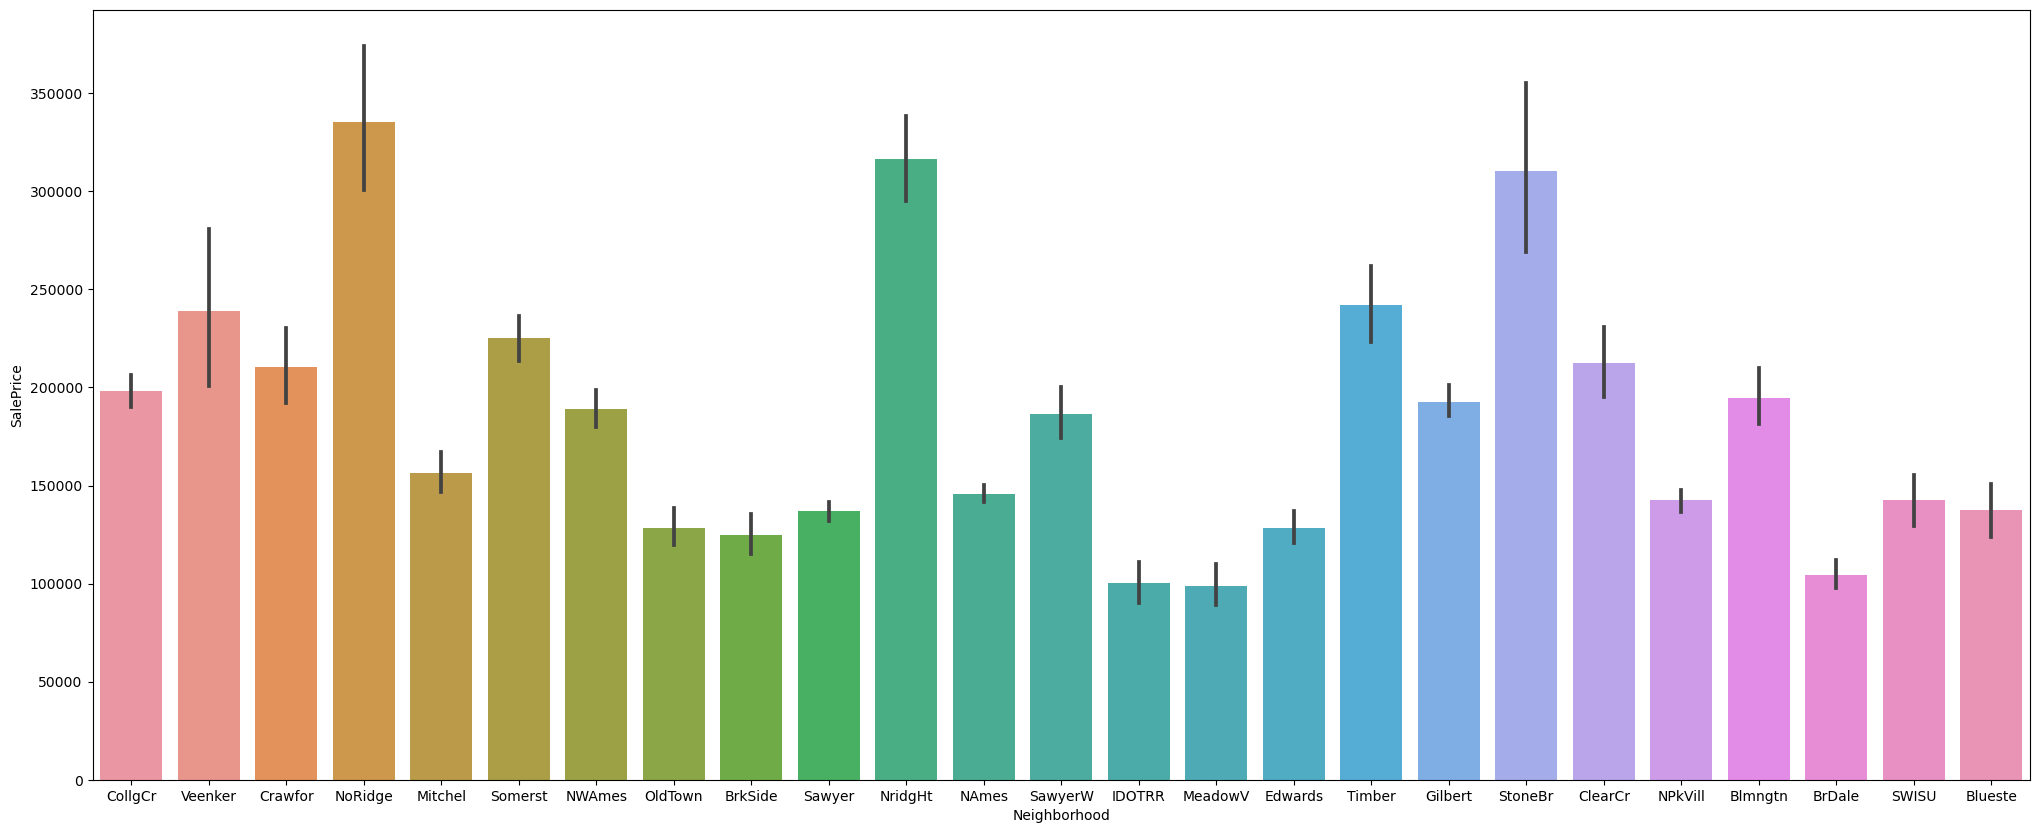

In [58]:
#Neighborhood(Physical locations within Ames city limits) by SalePrice
plt.figure(figsize=(25,10))
sns.barplot(data=df_train,x='Neighborhood',y='SalePrice')

### Conclusion:
<ul>
    <li>NoRidge and NridgHt has highest saleprice.</li>
</ul>
<i>NoRidge-Northridge, NridgHt-Northridge Heights</i>

### Outliers

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects.<br>
That means the outlier data points vary greatly from the expected values—either being much larger or significantly smaller. For data that follows a normal distribution, the values that fall more than three standard deviations from the mean are typically considered outliers.<br> 
They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining.

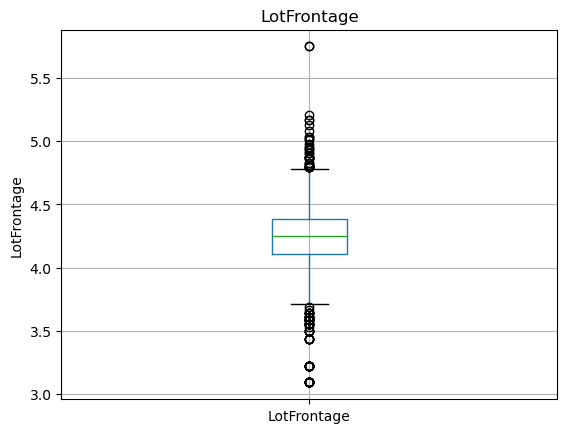

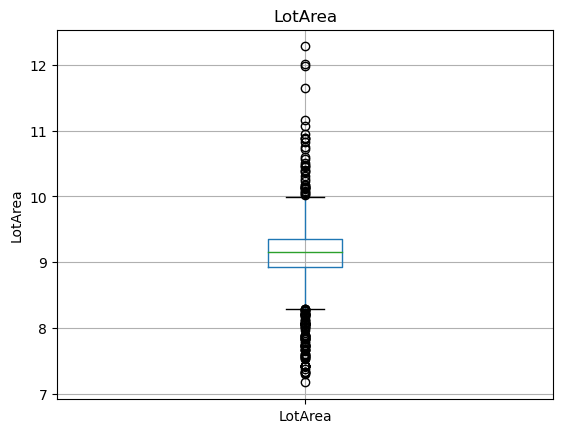

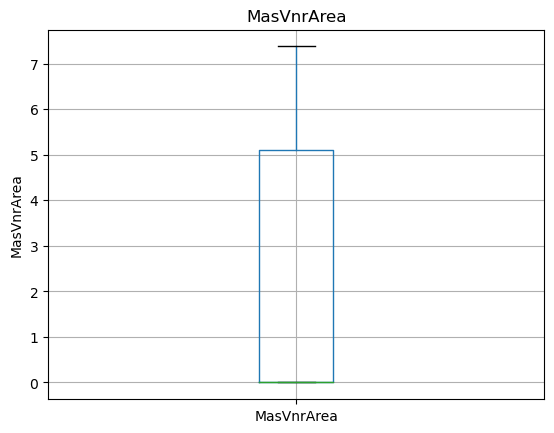

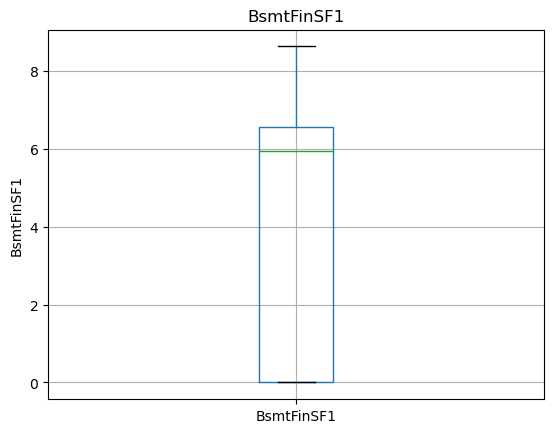

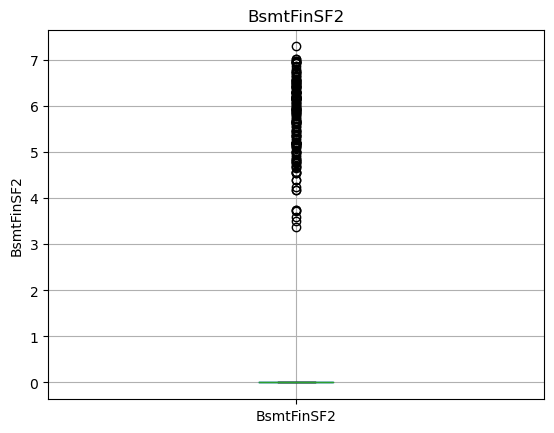

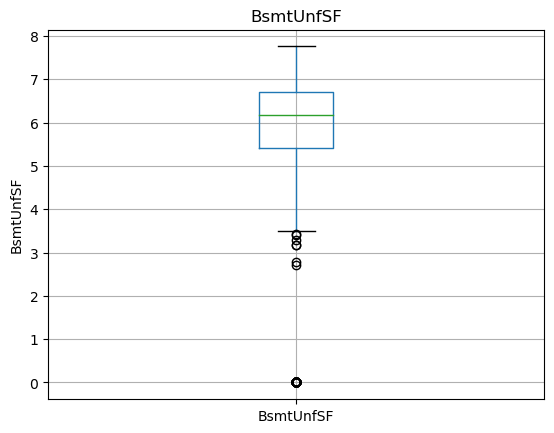

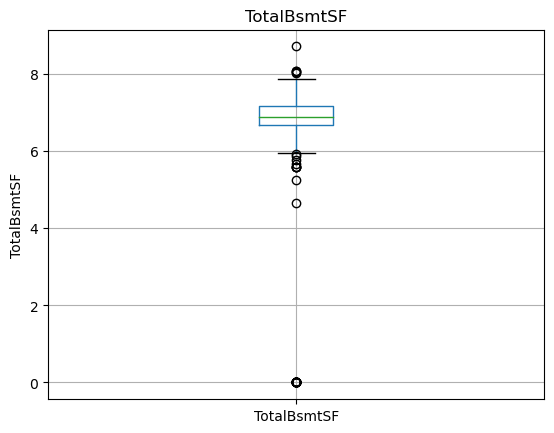

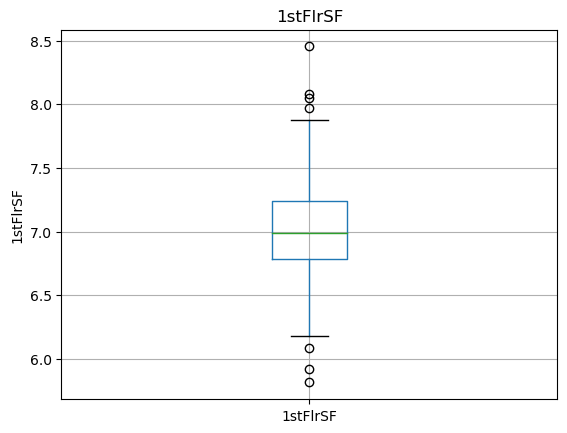

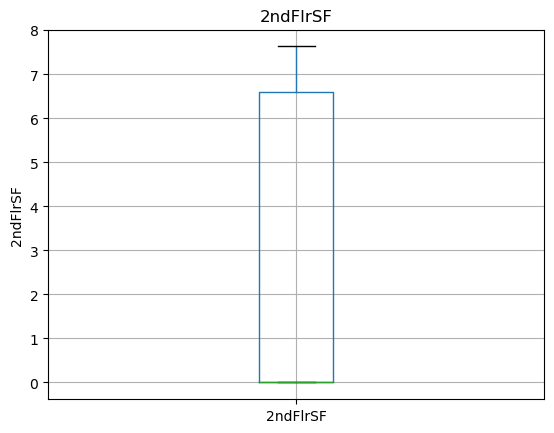

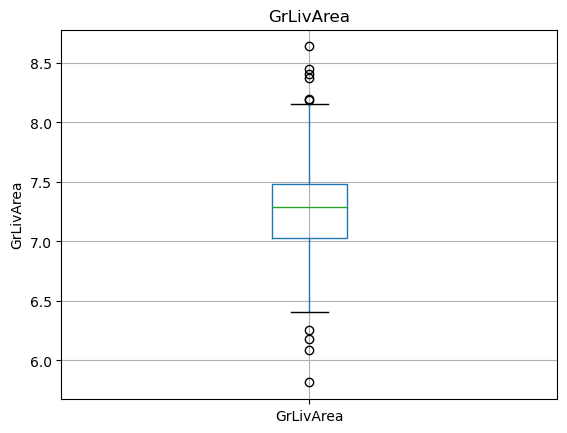

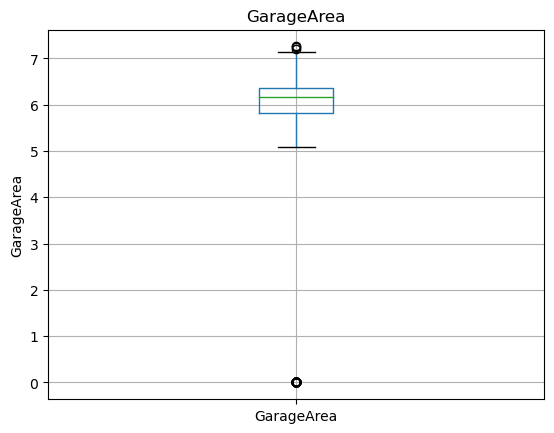

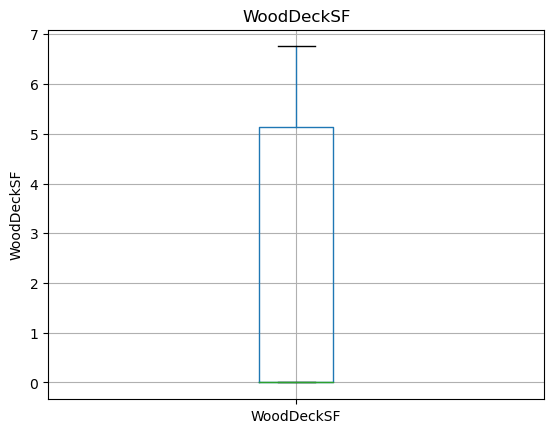

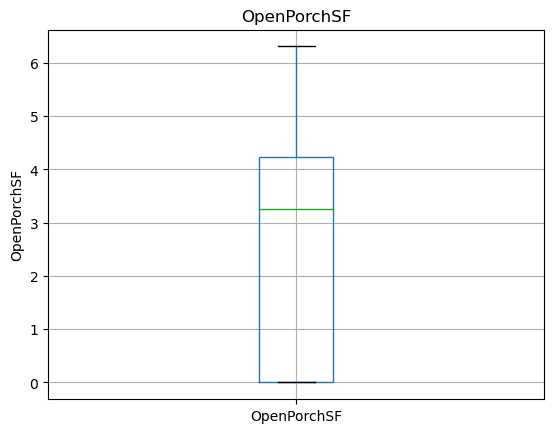

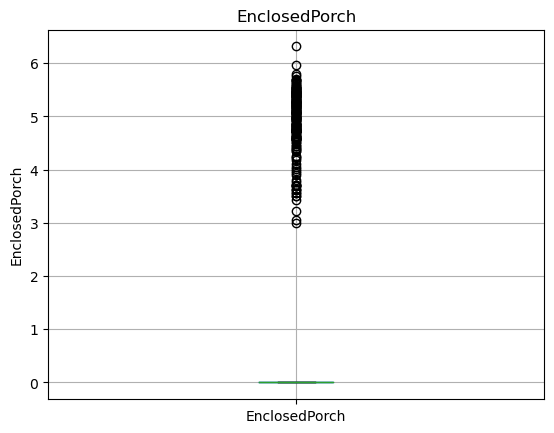

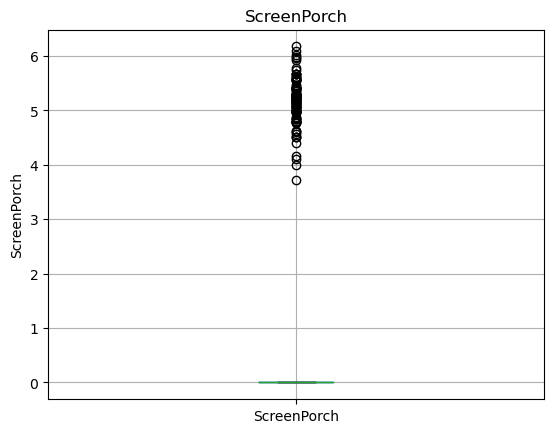

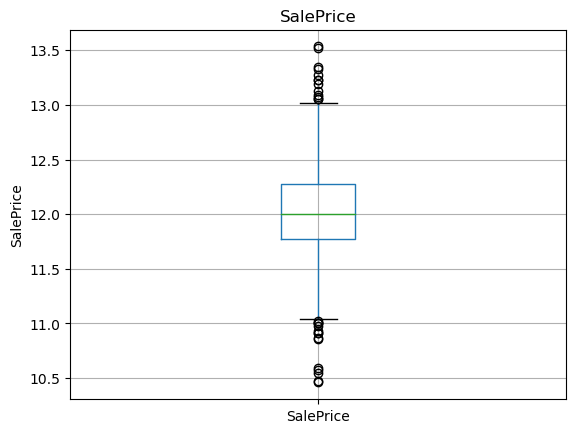

In [59]:
#Outliers
for feature in continues_feature:
    temp_data=df_train.copy()
    temp_data[feature]=np.log1p(temp_data[feature])
    temp_data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

As we can see in above boxplot that there are many features who have outliers.
so, we will be dealing with outliers in feature engineering section.

# 4. Feature Engineering

In [60]:
#df_train dataset
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df_train[feature]=df_train['YrSold']-df_train[feature]

In [61]:
#df_test dataset
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df_test[feature]=df_test['YrSold']-df_test[feature]

As we have seen above YrSold is not giving somewhat right values. So, we will not include YrSold.

In [62]:
#df_train dataset
num_features = ['LotFrontage', 'LotArea',  '1stFlrSF',  'GrLivArea']
for feature in num_features:
    df_train[feature] = np.log(df_train[feature])

In [63]:
#df_test dataset
num_features = ['LotFrontage', 'LotArea',  '1stFlrSF',  'GrLivArea']
for feature in num_features:
    df_test[feature] = np.log(df_test[feature])

In [64]:
#top 5 values of a dataset
df_train.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0          60       RL     4.174387  9.041922   Pave      Reg         Lvl   
1          20       RL     4.382027  9.169518   Pave      Reg         Lvl   
2          60       RL     4.219508  9.328123   Pave      IR1         Lvl   
3          70       RL     4.094345  9.164296   Pave      IR1         Lvl   
4          60       RL     4.430817  9.565214   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  6.752270       854             0   7.444249   
1          Y      SBrkr  7.140453         0             0   7.140453   
2          Y      SBrkr  6.824374       866             0   7.487734   
3          Y      SBrkr  6.867974       756             0   7.448334   
4          Y      SBrkr  7.043160      1053             0   7.695303   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd          5.0   
1          TA             6        Typ           1     Attchd         31.0   
2          Gd             6        Typ           1     Attchd          7.0   
3          Gd    

In [65]:
#top 5 values of a dataset
df_test.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0          20       RH     4.382027  9.360655   Pave      Reg         Lvl   
1          20       RL     4.394449  9.565704   Pave      IR1         Lvl   
2          60       RL     4.304065  9.534595   Pave      IR1         Lvl   
3          60       RL     4.356709  9.208138   Pave      IR1         Lvl   
4         120       RL     3.761200  8.518193   Pave      IR1         HLS   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam   
1    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam   
2    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
4    AllPub    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            5            6         49            49     Gable   
1     1Story            6            6         52            52       Hip   
2     2Story            5            5         13            12     Gable   
3     2Story            6            6         12            12     Gable   
4     1Story            8            5         18            18     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd       None         0.0        TA        TA   
1  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA   
2  CompShg     VinylSd     VinylSd       None         0.0        TA        TA   
3  CompShg     VinylSd     VinylSd    BrkFace        20.0        TA        TA   
4  CompShg     HdBoard     HdBoard       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       468.0   
1     CBlock       TA       TA           No          ALQ       923.0   
2      PConc       Gd       TA           No          GLQ       791.0   
3      PConc       TA       TA           No          GLQ       602.0   
4      PConc       Gd       TA           No          ALQ       263.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          LwQ       144.0      270.0        882.0    GasA        TA   
1          Unf         0.0      406.0       1329.0    GasA        TA   
2          Unf         0.0      137.0        928.0    GasA        Gd   
3          Unf         0.0      324.0        926.0    GasA        Ex   
4          Unf         0.0     1017.0       1280.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  6.797940         0             0   6.797940   
1          Y      SBrkr  7.192182         0             0   7.192182   
2          Y      SBrkr  6.833032       701             0   7.395722   
3          Y      SBrkr  6.830874       678             0   7.380256   
4          Y      SBrkr  7.154615         0             0   7.154615   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           0.0           0.0         1         0             2             1   
1           0.0           0.0         1         1             3             1   
2           0.0           0.0         2         1             3             1   
3           0.0           0.0         2         1             3             1   
4           0.0           0.0         2         0             2             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           0     Attchd         49.0   
1          Gd             6        Typ           0     Attchd         52.0   
2          TA             6        Typ           1     Attchd         13.0   
3          Gd    

In [66]:
#Transforming train dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_final_train = df_train.copy()
df_final_train
for feature in categorical_feature:
    df_final_train[feature] = le.fit_transform(df_final_train[feature])
df_final_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0          60         3     4.174387  9.041922       1         3            3   
1          20         3     4.382027  9.169518       1         3            3   
2          60         3     4.219508  9.328123       1         0            3   
3          70         3     4.094345  9.164296       1         0            3   
4          60         3     4.430817  9.565214       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             5           2           2   
1          0          2          0            24           1           2   
2          0          4          0             5           2           2   
3          0          0          0             6           2           2   
4          0          2          0            15           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           5            7            5          5             5   
1         0           2            6            8         31            31   
2         0           5            7            5          7             6   
3         0           5            7            5         91            36   
4         0           5            8            5          8             8   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         1           12           13           1       196.0   
1          1         1            8            8           2         0.0   
2          1         1           12           13           1       162.0   
3          1         1           13           15           2         0.0   
4          1         1           12           13           1       350.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          2          4           2         2         3             3   
1          3          4           1         2         3             1   
2          2          4           2         2         3             2   
3          3          4           0         3         1             3   
4          2          4           2         2         3             0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             2         706             5           0        150          856   
1             0         978             5           0        284         1262   
2             2         486             5           0        434          920   
3             0         216             5           0        540          756   
4             2         655             5           0        490         1145   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          0           1           4  6.752270       854   
1        1          0           1           4  7.140453         0   
2        1          0           1           4  6.824374       866   
3        1          2           1           4  6.867974       756   
4        1          0           1           4  7.043160      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0   7.444249             1             0         2         1   
1             0   7.140453             0             1         2         0   
2             0   7.487734             1             0         2         1   
3             0   7.448334             1             0         1         0   
4             0   7.695303             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1            2             8           6   
1             3             1            3             6           6   
2             3             1            2             6           6   
3             3             1      

In [67]:
#Transforming test dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_final_test = df_test.copy()
for feature in categorical_feature:
    df_final_test[feature] = le.fit_transform(df_final_test[feature])
df_final_test.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0          20         2     4.382027  9.360655       1         3            3   
1          20         3     4.394449  9.565704       1         0            3   
2          60         3     4.304065  9.534595       1         0            3   
3          60         3     4.356709  9.208138       1         0            3   
4         120         3     3.761200  8.518193       1         0            1   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0            12           1           2   
1          0          0          0            12           2           2   
2          0          4          0             8           2           2   
3          0          4          0             8           2           2   
4          0          4          0            22           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           2            5            6         49            49   
1         0           2            6            6         52            52   
2         0           4            5            5         13            12   
3         0           4            6            6         12            12   
4         4           2            8            5         18            18   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         0           10           12           2         0.0   
1          3         0           11           13           1       108.0   
2          1         0           10           12           2         0.0   
3          1         0           10           12           1        20.0   
4          1         0            6            6           2         0.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          3          4           1         3         3             3   
1          3          4           1         3         3             3   
2          3          4           2         2         3             3   
3          3          4           2         3         3             3   
4          2          4           2         2         3             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             4       468.0             3       144.0      270.0        882.0   
1             0       923.0             5         0.0      406.0       1329.0   
2             2       791.0             5         0.0      137.0        928.0   
3             2       602.0             5         0.0      324.0        926.0   
4             0       263.0             5         0.0     1017.0       1280.0   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        0          4           1           3  6.797940         0   
1        0          4           1           3  7.192182         0   
2        0          2           1           3  6.833032       701   
3        0          0           1           3  6.830874       678   
4        0          0           1           3  7.154615         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0   6.797940           0.0           0.0         1         0   
1             0   7.192182           0.0           0.0         1         1   
2             0   7.395722           0.0           0.0         2         1   
3             0   7.380256           0.0           0.0         2         1   
4             0   7.154615           0.0           0.0         2         0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             2             1            3             5           6   
1             3             1            2             6           6   
2             3             1            3             6           6   
3             3             1      

# 5. ML model

In [68]:
#Train test split
from sklearn.model_selection import train_test_split
y=df_final_train['SalePrice']
X=df_final_train.drop(columns='SalePrice')

In [69]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [70]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train).round(4)


0.8536

In [71]:
y_pred=reg.predict(X_test)

In [72]:
#Ridge Regression
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train).round(4)

0.8534

In [73]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train, y_train)
regr.score(X_train, y_train).round(4)

0.705

In [74]:
#K-Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=42)
neigh.fit(X_train, y_train)
regr.score(X_train, y_train).round(4)

0.705

In [75]:
y_test_pred = neigh.predict(df_final_test)

In [76]:
y_test_pred

array([145063.0952381 , 157767.85714286, 197550.78571429, ...,
       188169.        , 118371.61904762, 230098.88095238])

In [77]:
submission = pd.DataFrame({
"Id":org_df_test['Id'],
"SalePrice": y_test_pred
})

In [78]:
submission.head()

Id      SalePrice
0  1461  145063.095238
1  1462  157767.857143
2  1463  197550.785714
3  1464  182804.523810
4  1465  161427.166667

In [79]:
#submission file
submission.to_csv(path_or_buf = 'submission.csv',index = False)